# Progetto "Personal Key Indicators of Heart Disease"

#### A cura di Alessandro La Cava 247436

## 1. Introduzione

Il dataset che andremo ad analizzare contiene i dati dell'indagine annuale CDC 2020 di circa 320 mila adulti relativi al loro stato di salute.

Secondo il CDC (Centers for Disease Control and Prevention), le malattie cardiache sono una delle principali cause di morte per le persone della maggior parte delle etnie negli Stati Uniti. Circa la metà di tutti gli americani (47%) ha almeno 1 dei 3 fattori di rischio chiave per le malattie cardiache: ipertensione, colesterolo alto e fumo. Altri indicatori chiave includono lo stato diabetico, l'obesità (alto indice di massa corporea), poca attività fisica o bere troppo alcol.

Il dataset proviene dal CDC ed è una parte importante del Behavioral Risk Factor Surveillance System (BRFSS), che conduce sondaggi telefonici annuali per raccogliere dati sullo stato di salute dei residenti negli Stati Uniti. Il dataset include dati del 2020 ed inizialmente era costituito da 279 colonne. La stragrande maggioranza delle colonne sono domande poste agli intervistati sul loro stato di salute, ad esempio "Hai serie difficoltà a camminare o salire le scale?" o "Hai fumato almeno 100 sigarette in tutta la tua vita?". Il dataset originale di quasi 300 variabili è stato ridotto a circa 20 variabili.

L'obiettivo di questo progetto è di analizzare i fattori che hanno il maggiore impatto sulle malattie cardiache, addestrando un classificatore binario, in modo da prevedere l'insorgere di eventuali malattie cardiache.

## 2. Librerie utilizzate

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings("ignore")

## 3. Analisi del Dataset

Per iniziare, importo il dataset e cerco di ottenere semplici informazioni riguardo alla dimensione e alla struttura.

In [2]:
df = pd.read_csv('./heart_2020_cleaned.csv')
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [3]:
df.shape

(319795, 18)

Dall'output possiamo dire che il nostro dataset è composto da:
- 319795 record
- 18 attributi

Il dataset è costituito da 18 attributi (9 booleani, 5 stringhe e 4 decimali), la cui descrizione è riportata di seguito:
1. HeartDisease : indica se il paziente ha avuto o meno malattie cardiache (Yes / No)
2. BMI : indice di massa corporea (Body Mass Index)
3. Smoking : indica se il paziente ha mai fumato (Yes / No)
4. AlcoholDrinking : indica se il paziente ha mai bevuto alcolici (Yes / No)
5. Stroke : indica se il paziente ha mai avuto un ictus? (Yes / No)
6. PhysicalHealth : rappresenta il numero di giorni in cui la salute fisica del paziente non è stata sufficientemente buona (0-30 days)
7. MentalHealth : rappresenta il numero di giorni in cui la salute mentale del paziente non è stata sufficientemente buona? (0-30 days)
8. DiffWalking: indica se la persona ha difficoltà a camminare o a salire le scale (Yes / No)
9. Sex : sesso del paziente
10. AgeCategory : 13 categorie di età
    * 18-24
    * 25-29
    * 30-34
    * 35-39
    * 40-44
    * 45-49
    * 50-54
    * 55-59
    * 60-64
    * 65-69
    * 70-74
    * 75-79
    * 80 or older
11. Race : rappresenta l'etnia del paziente
12. Diabetic : indica se il paziente soffre di diabete (Yes / No)
13. PhysicalActivity : indica se il paziente ha fatto attività fisica negli ultimi 30 giorni oltre al normale lavoro (Yes / No)
14. GenHealth : rappresenta la salute generale del paziente
15. SleepTime: rappresenta le ore di sonno in un periodo di 24 ore
16. Asthma : indica se il paziente soffre di asma (Yes / No)
17. KidneyDisease : indica se il paziente soffre di malattie al fegato (Yes / No)
18. SkinCanser : indica se il paziente soffre di cancro alla pelle (Yes / No)

Andiamo a visualizzare quelle che sono la struttura e le informazioni del nostro dataset.

In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Descrizione generale delle statistiche del dataset.

In [6]:
df.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

In [7]:
df.describe(include="all")

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN          No  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top          No              Yes  Very good            NaN      No   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

A questo punto verifichiamo la presenza di eventuali valori nulli all'interno del dataset.

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Non sono presenti valori mancanti, per cui possiamo passare direttamente al controllo di eventuali record duplicati.

In [9]:
df.duplicated().sum()

18078

Poichè sono presenti diversi record duplicati, li rimuoviamo.

In [10]:
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(301717, 18)


Visualizziamo graficamente la distribuzione degli attributi all'interno del dataset.

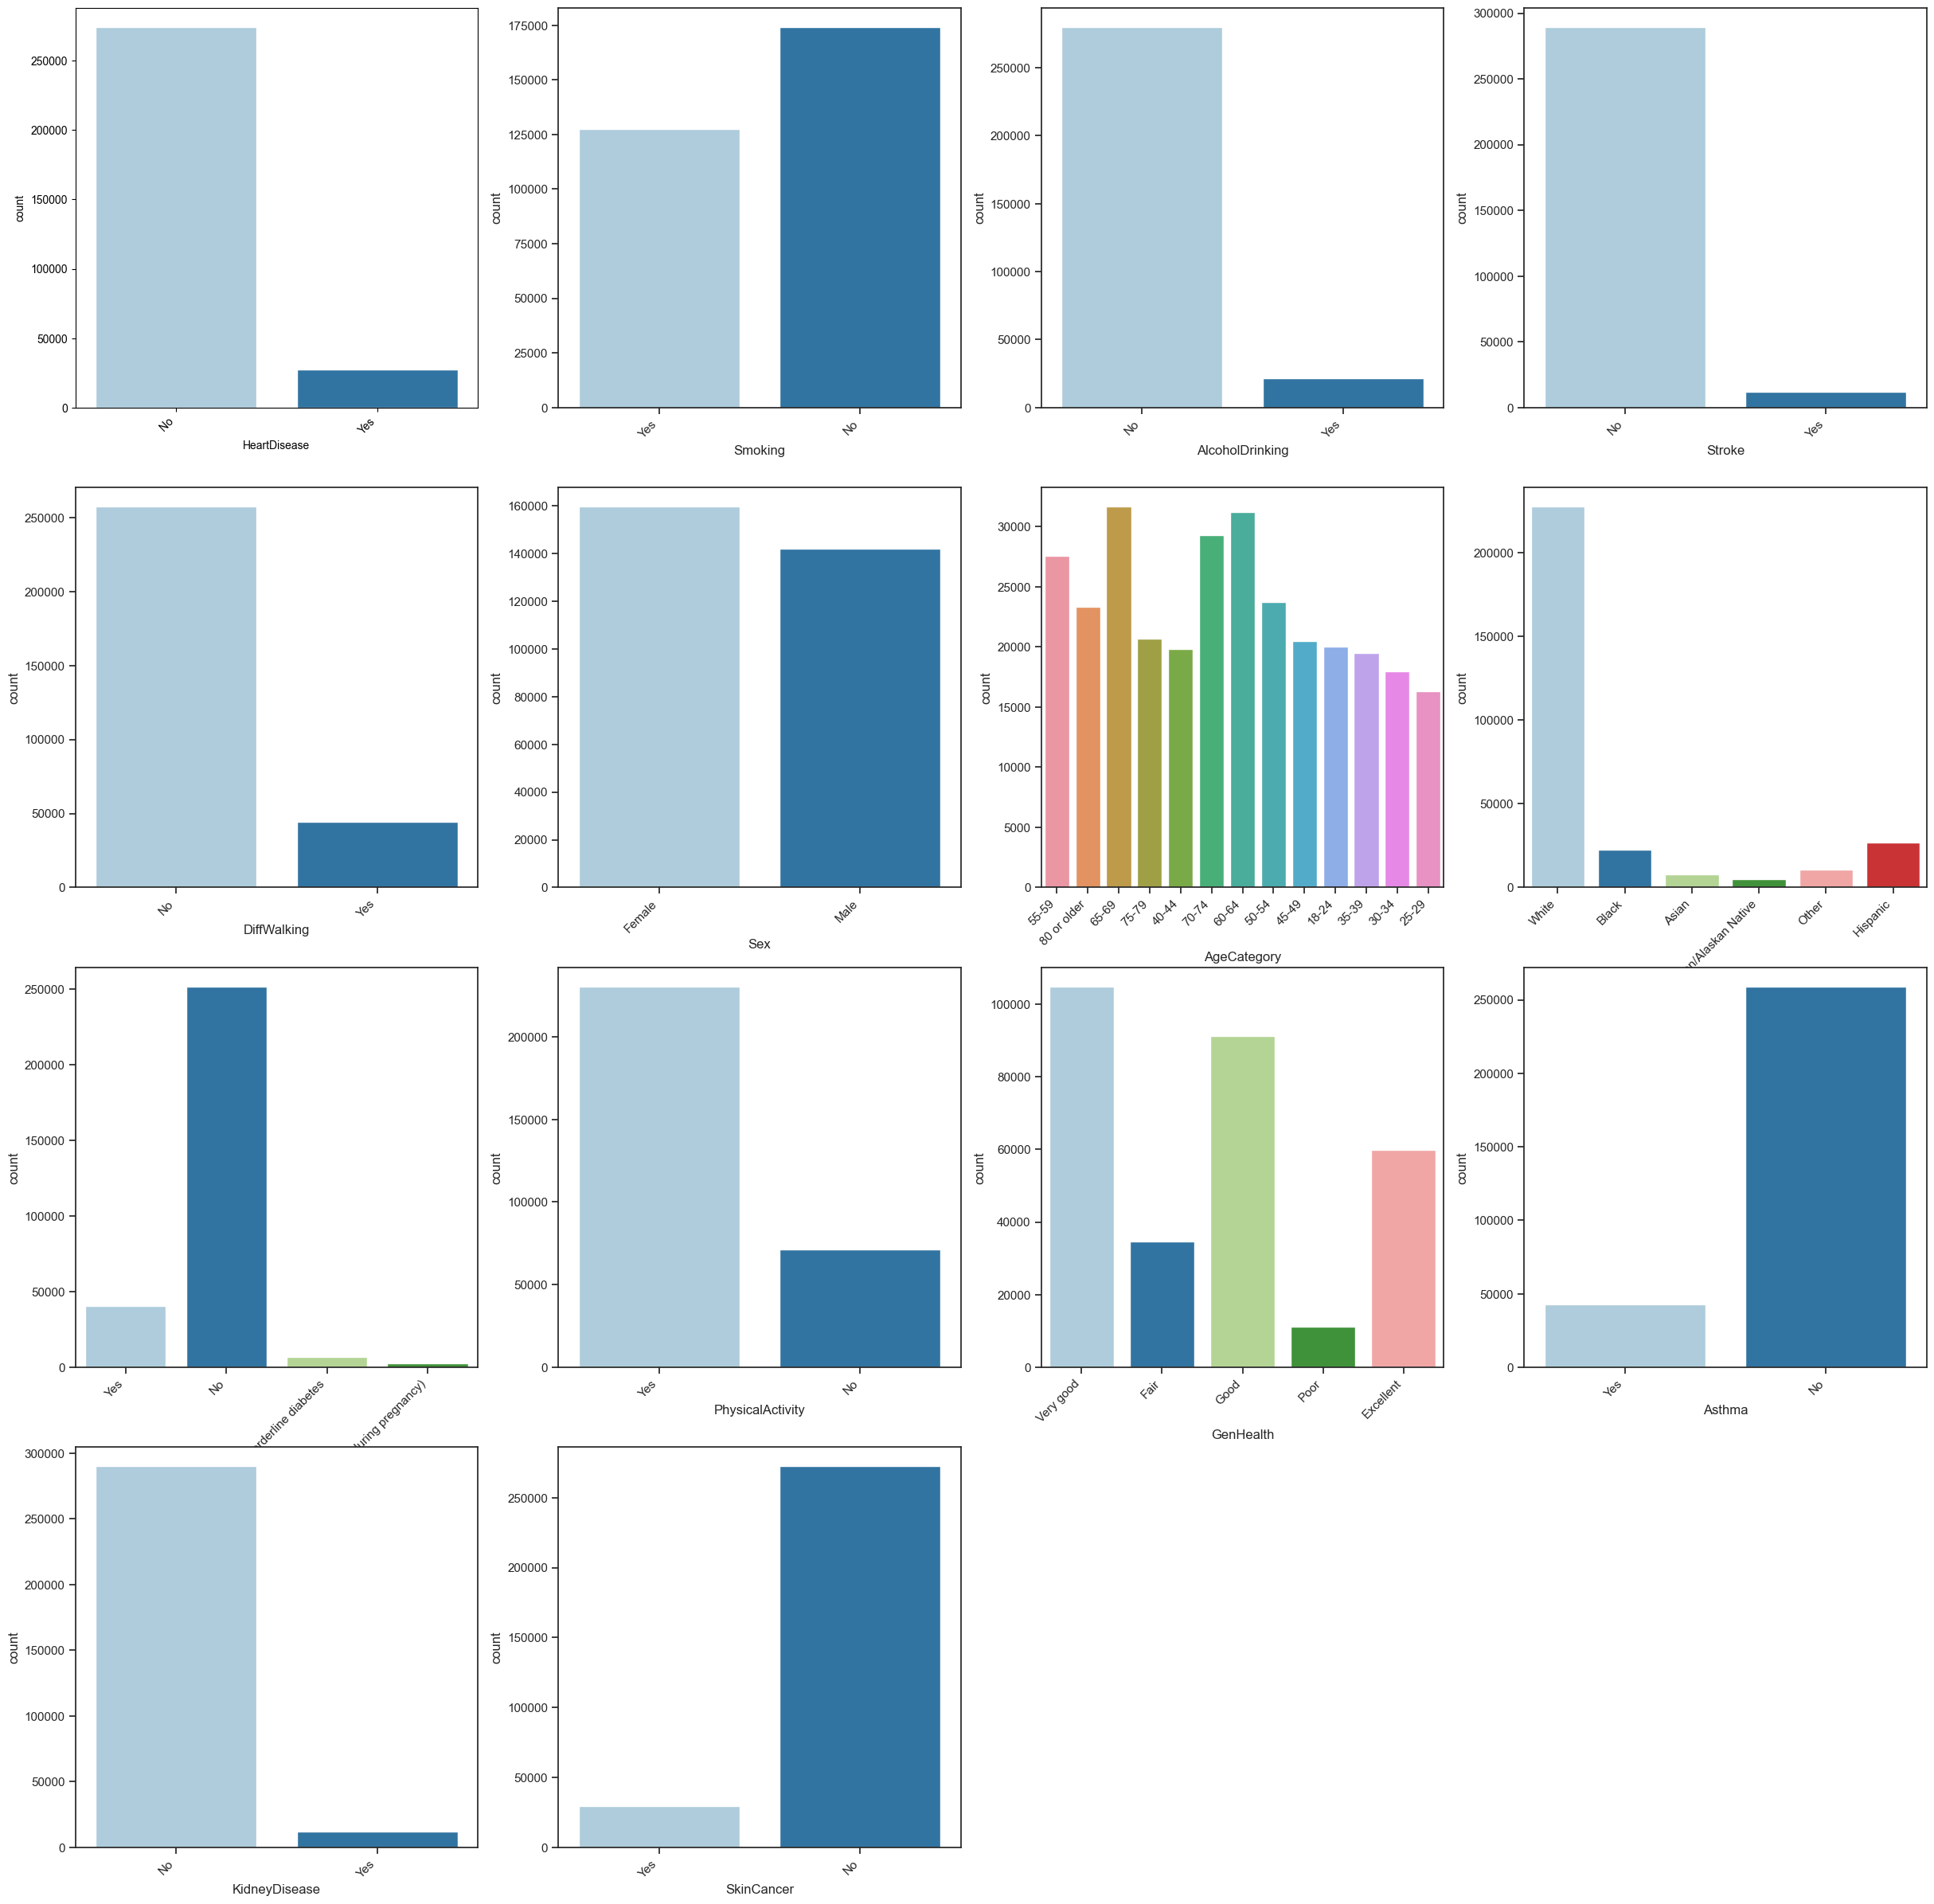

In [11]:
categorical_features = df.select_dtypes(include=[object,'category'])

plt.figure(figsize = (30,30))
for i, feature in enumerate(categorical_features):
      plt.subplot(4,4,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

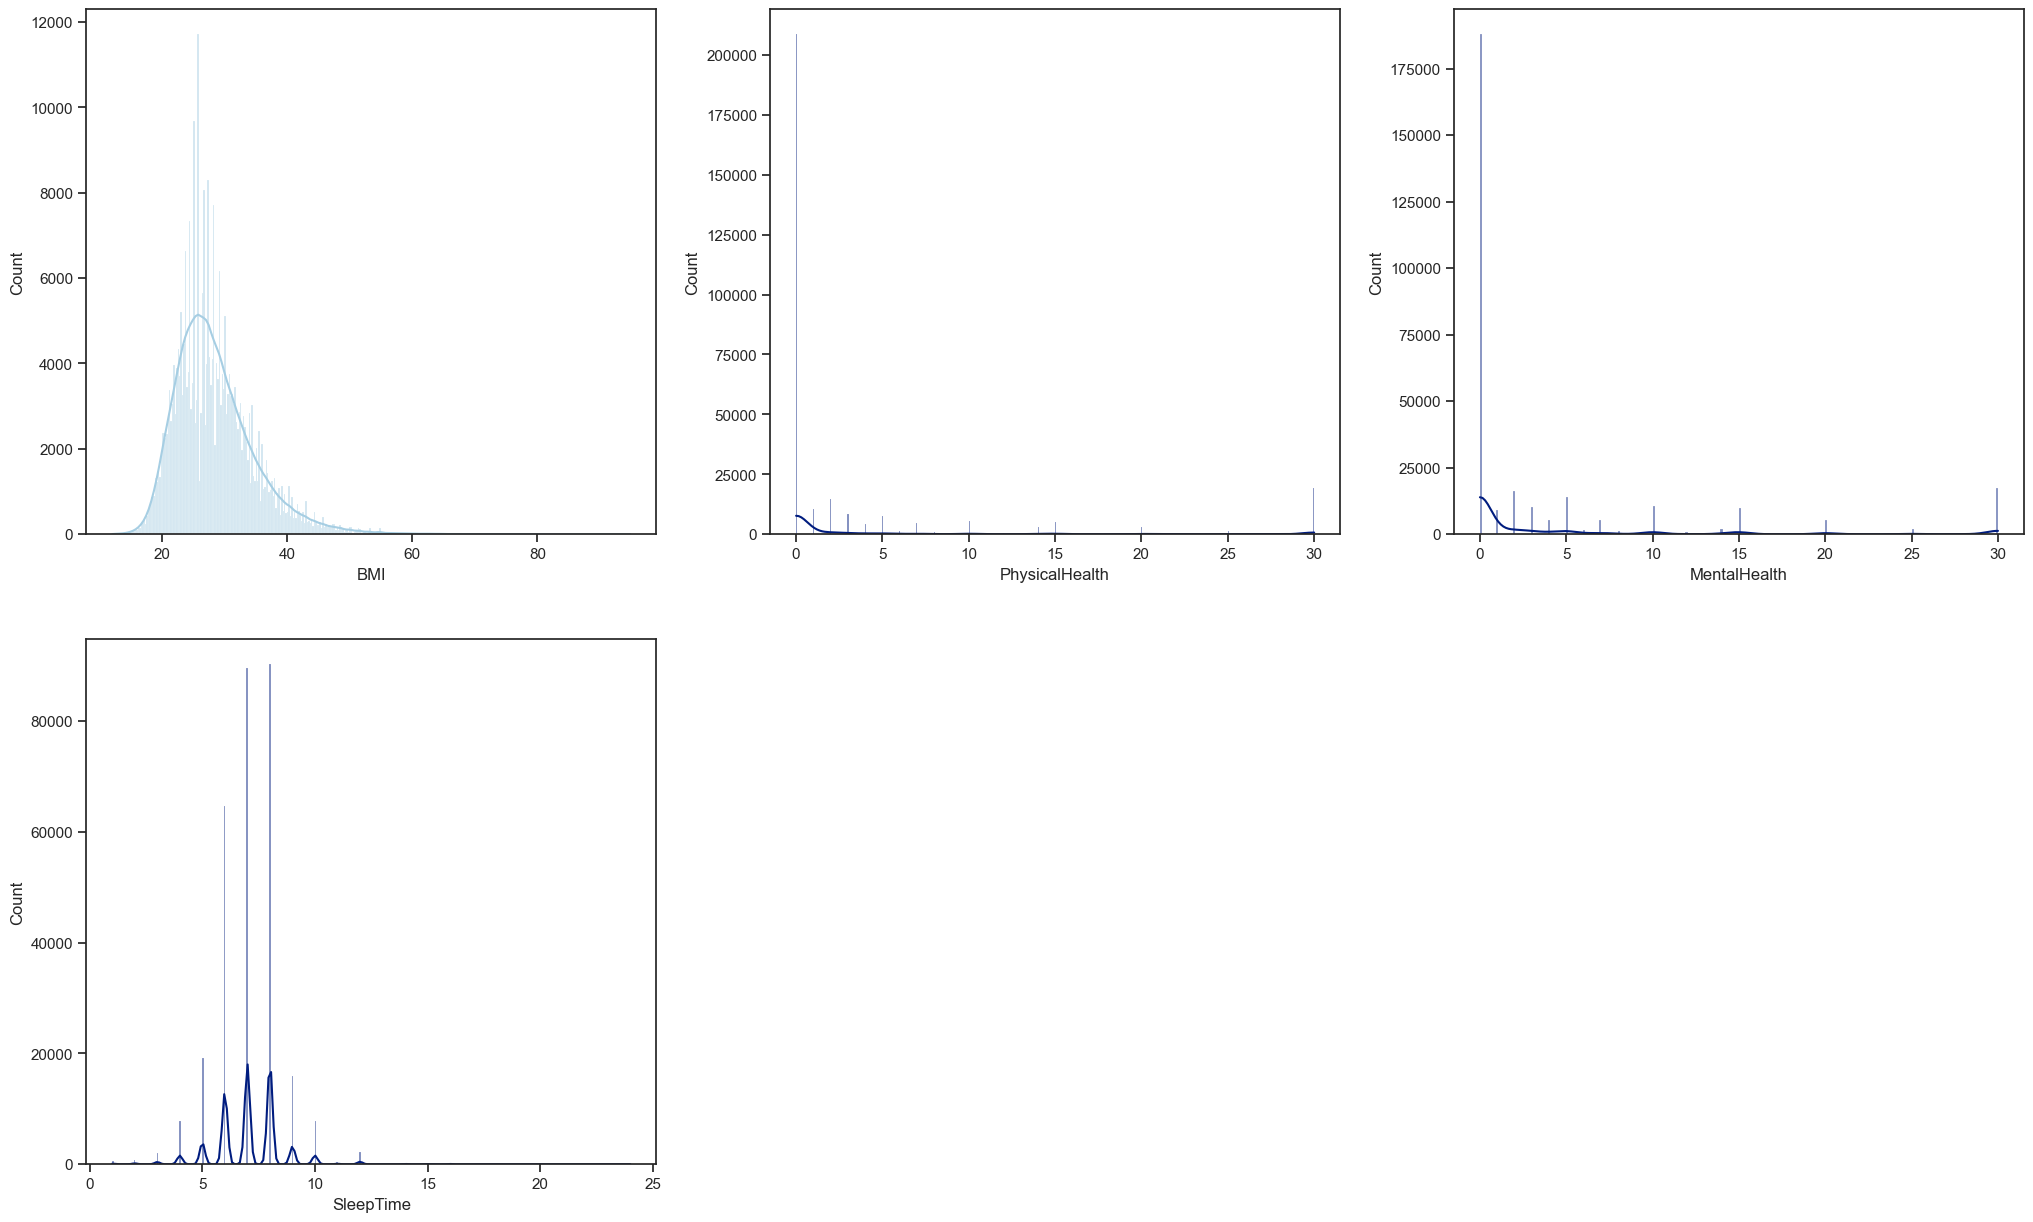

In [12]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize = (25,15))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(2,3,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

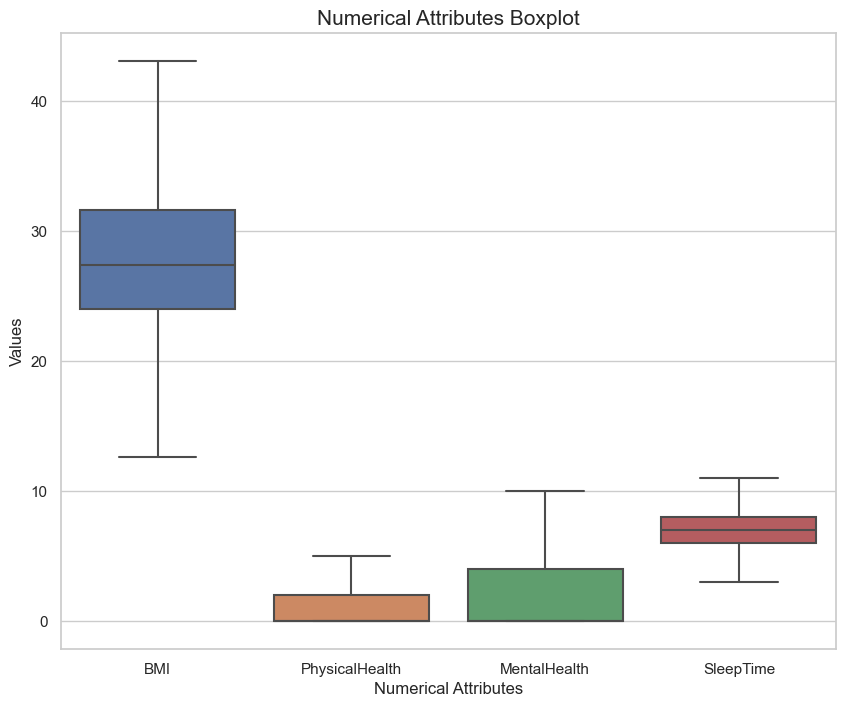

In [13]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=numeric_features, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

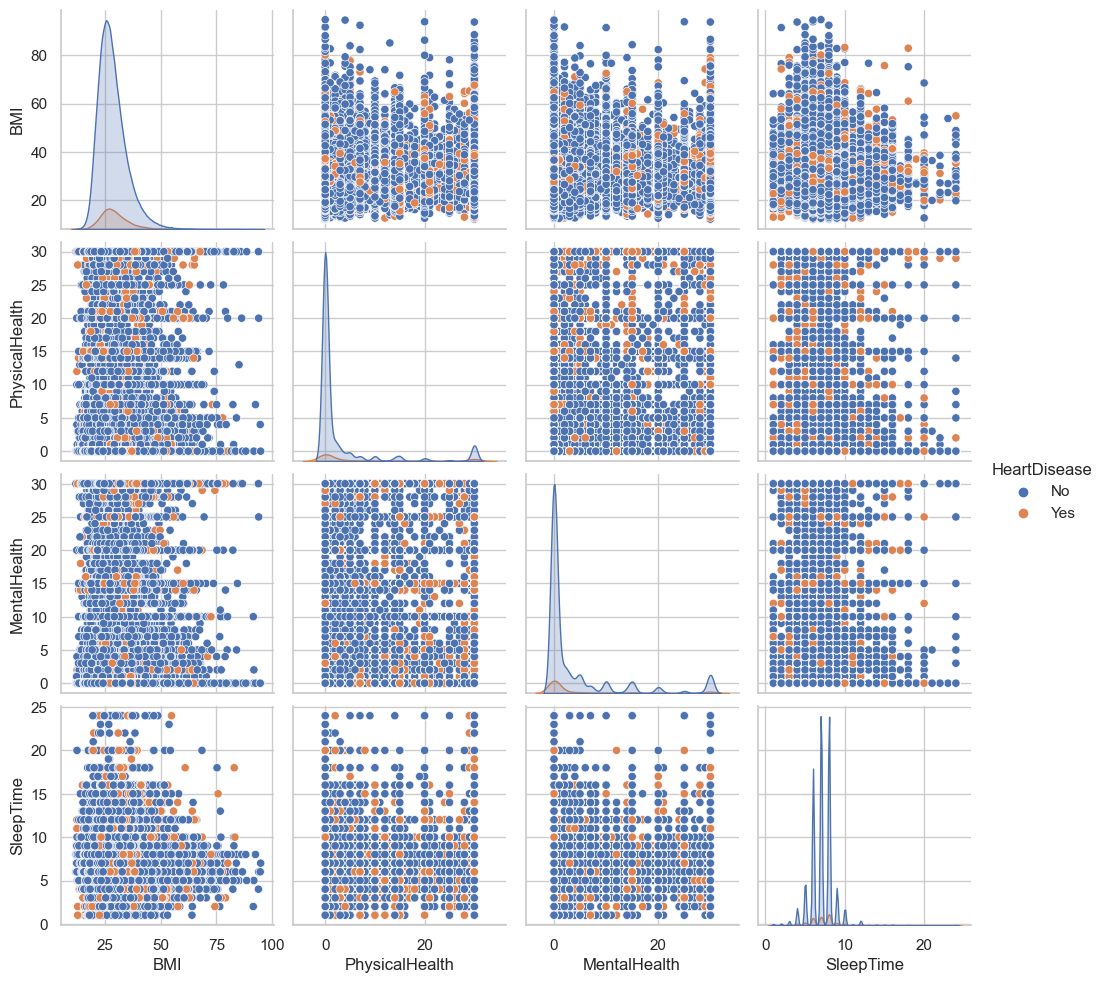

In [14]:
df_numerical = numeric_features.join(df['HeartDisease'])
sns.pairplot(df_numerical,hue="HeartDisease")

Dopo aver fornito una panoramica generale su come sono distribuite le feature e sulle varie relazioni esistenti tra di esse, ci concentriamo sull'analizzare alcuni degli attributi presenti all'interno del dataset in modo da individuare quelli che potrebbero influenzare maggiormente l'insorgere di patologie cardiache. 

**Prima assunzione**: l'etnia non influenza l'insorgere di malattie cardiache

In [15]:
df_race = df.groupby(['Race','HeartDisease'])[['BMI']].count()
df_race = df_race.rename({'BMI': 'count'},axis=1)
df_race['prob'] = df_race['count'] / df.groupby('Race').count()['HeartDisease']
df_race

count      prob
Race                           HeartDisease                  
American Indian/Alaskan Native No              4650  0.895609
                               Yes              542  0.104391
Asian                          No              7727  0.966721
                               Yes              266  0.033279
Black                          No             21081  0.924200
                               Yes             1729  0.075800
Hispanic                       No             25664  0.946767
                               Yes             1443  0.053233
Other                          No             10005  0.918648
                               Yes              886  0.081352
White                          No            205329  0.901657
                               Yes            22395  0.098343

I risultati ottenuti non supportano l'assunzione fatta ma ci danno molte altre informazioni riguardo l'attributo Race. Infatti, è possibile notare come, sebbene la maggior parte delle malattie cardiache riguardi l'etnia White, l'etnia American Indian/Alaskan Native presenta una percentuale maggiore di soggetti malati (circa il 10% del campione analizzato). Questo ci può far desumere che l'etnia American Indian/Alaskan Native tenda ad essere più soggetto a malattie cardiache. Per una più facile visualizzazione delle informazioni andiamo a costruire e visualizzare il relativo istogramma.

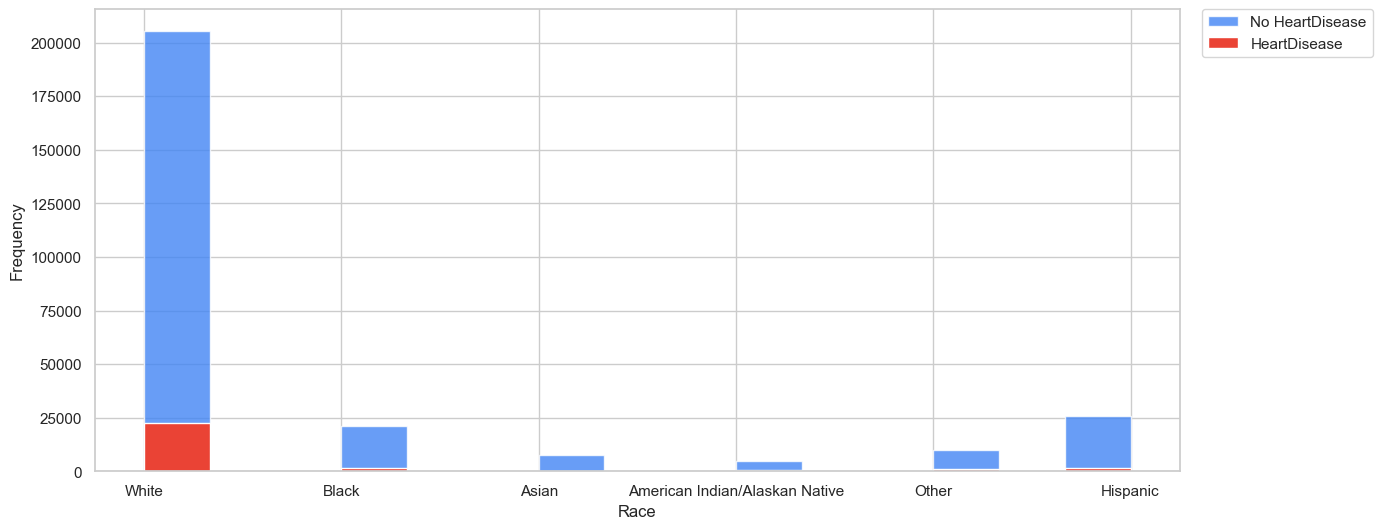

In [16]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Seconda assunzione**: i pazienti di sesso maschile sono più soggetti a malattie cardiache

In [17]:
df_sex = df.groupby(['Sex','HeartDisease'])[['BMI']].count()
df_sex = df_sex.rename({'BMI': 'count'},axis=1)
df_sex['prob'] = df_sex['count'] / df.groupby('Sex').count()['HeartDisease']
df_sex

count      prob
Sex    HeartDisease                  
Female No            148458  0.929774
       Yes            11213  0.070226
Male   No            125998  0.887023
       Yes            16048  0.112977

In questo caso i risultati ottenuto supportano l'assunzione fatta; infatti, è possibile notare come la maggior parte dei pazienti soggetti a malattie cardiache sia di sesso maschile, nonostante la popolazione campione presenti un numero più elevato di pazienti di sesso femminile. In particolare, gli uomini hanno circa 1.6 volte più probabilità di essere soggetti a malattie cardiachie rispetto alle donne. Anche in questo caso andiamo a visualizzare il relativo istogramma.

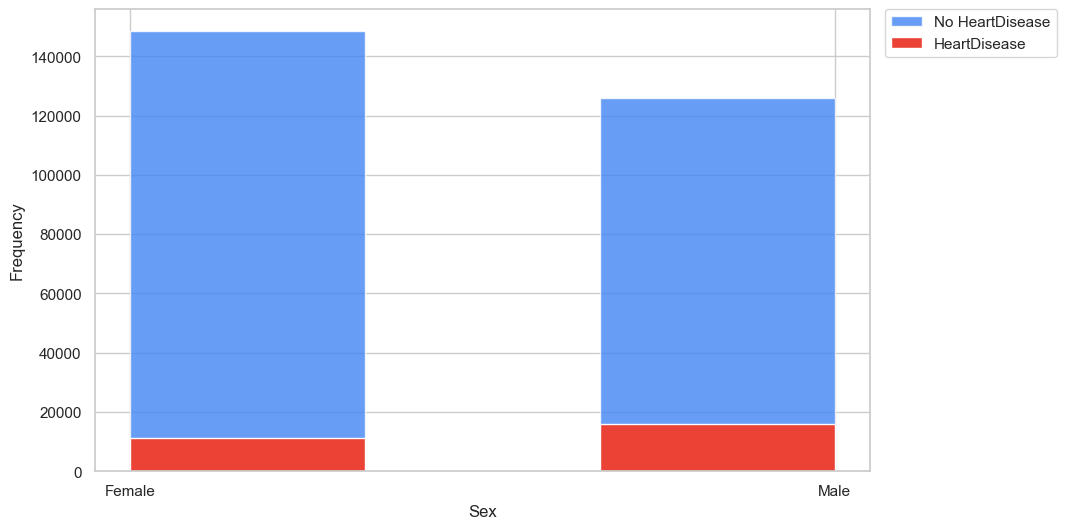

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Terza assunzione**: lo stato di salute generale influenza notevolmente l'insorgere di malattie cardiache

In [19]:
df_ht = df.groupby(['GenHealth','HeartDisease'])[['BMI']].count()
df_ht = df_ht.rename({'BMI': 'count'},axis=1)
df_ht['prob'] = df_ht['count'] / df.groupby('GenHealth').count()['HeartDisease']
df_ht

count      prob
GenHealth HeartDisease                 
Excellent No            58242  0.974974
          Yes            1495  0.025026
Fair      No            27576  0.795637
          Yes            7083  0.204363
Good      No            81734  0.895823
          Yes            9505  0.104177
Poor      No             7436  0.658869
          Yes            3850  0.341131
Very good No            99468  0.949158
          Yes            5328  0.050842

L'assunzione fatta, seppur banale, è confermata dai risultati ottenuti: più lo stato di salute è basso più il paziente diventa soggetto all'insorgere di malattie cardiache; in particolare, il 34% dei soggetti che presenta uno stato di salute molto basso è soggetto a malattie cardiache. Anche in questo caso andiamo a visualizzare il relativo istogramma.

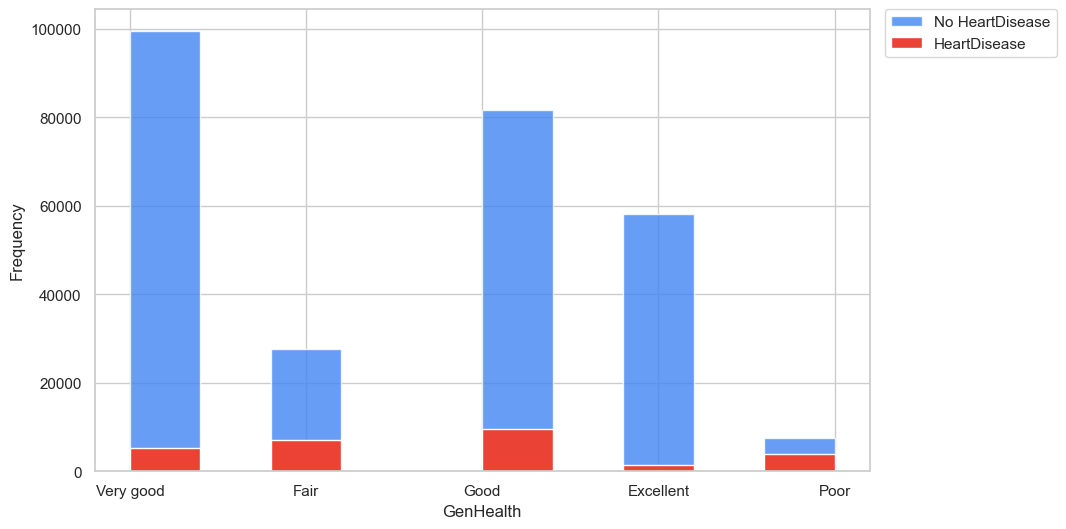

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Quarta assunzione**: i pazienti che presentano difficoltà nel camminare o nel salire le scale sono più soggetti all'insorgere di malattie cardiache

In [21]:
df_pa = df.groupby(['PhysicalActivity','HeartDisease'])[['BMI']].count()
df_pa = df_pa.rename({'BMI': 'count'},axis=1)
df_pa['prob'] = df_pa['count'] / df.groupby('PhysicalActivity').count()['HeartDisease']
df_pa

count      prob
PhysicalActivity HeartDisease                  
No               No             61423  0.861412
                 Yes             9882  0.138588
Yes              No            213033  0.924574
                 Yes            17379  0.075426

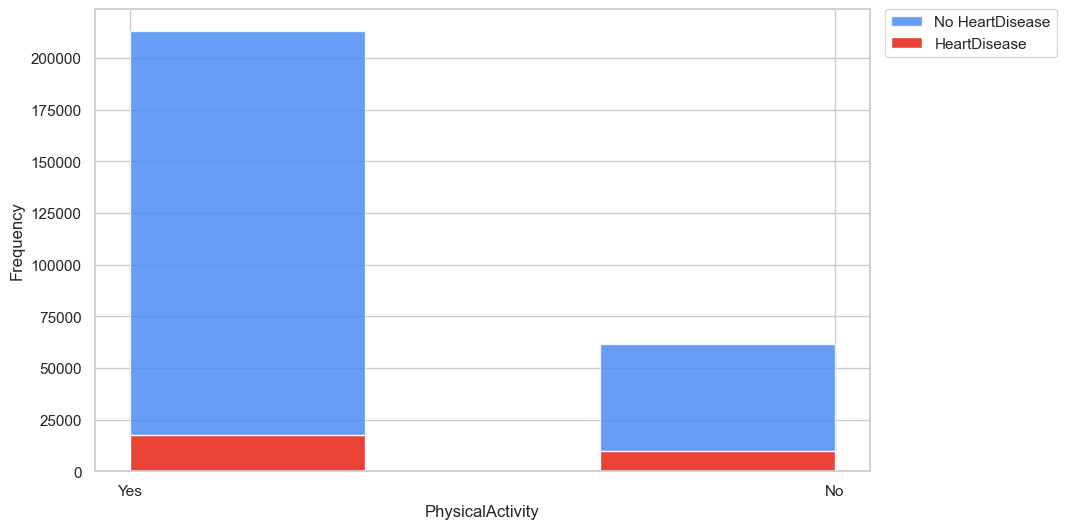

In [22]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Quinta assunzione**: il fumo aumenta l'insorgere di malattie cardiache

In [23]:
df_smk = df.groupby(['Smoking','HeartDisease'])[['BMI']].count()
df_smk = df_smk.rename({'BMI': 'count'},axis=1)
df_smk['prob'] = df_smk['count'] / df.groupby('Smoking').count()['HeartDisease']
df_smk

count      prob
Smoking HeartDisease                  
No      No            163028  0.935266
        Yes            11284  0.064734
Yes     No            111428  0.874597
        Yes            15977  0.125403

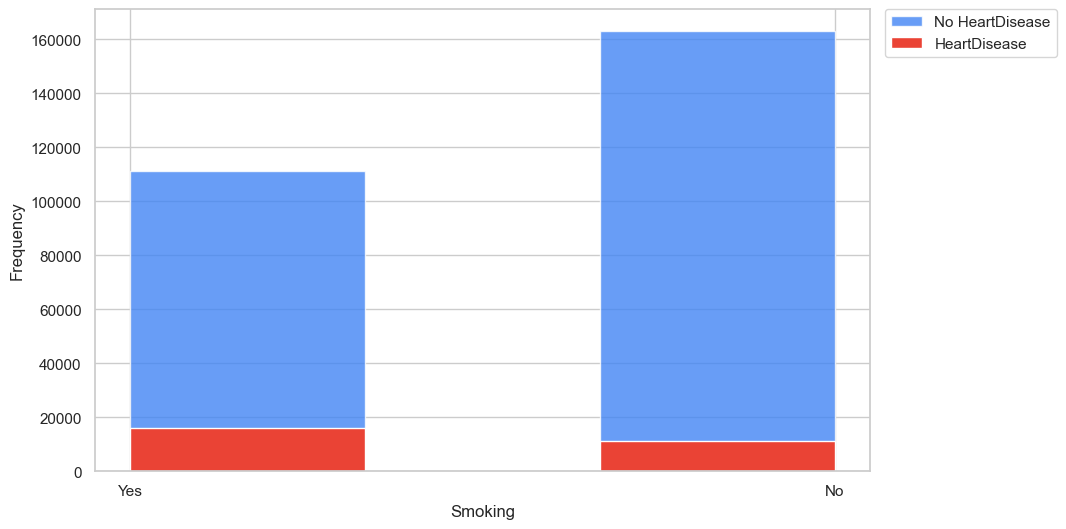

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Possiamo notare come il fumare sia un fattore molto influente; infatti, rispetto ai non fumatori, i fumatori hanno circa il doppio delle probabilità di essere soggetti a malattie cardiache.

**Sesta assunzione**: l'età è il fattore che influenza maggiormente l'insorgere di malattie cardiache

In [25]:
df_age = df.groupby(['AgeCategory','HeartDisease'])[['BMI']].count()
df_age = df_age.rename({'BMI': 'count'},axis=1)
df_age['prob'] = df_age['count'] / df.groupby('AgeCategory').count()['HeartDisease']
df_age

count      prob
AgeCategory HeartDisease                 
18-24       No            19868  0.993499
            Yes             130  0.006501
25-29       No            16179  0.991846
            Yes             133  0.008154
30-34       No            17727  0.987412
            Yes             226  0.012588
35-39       No            19230  0.984841
            Yes             296  0.015159
40-44       No            19351  0.975500
            Yes             486  0.024500
45-49       No            19775  0.963788
            Yes             743  0.036212
50-54       No            22353  0.941734
            Yes            1383  0.058266
55-59       No            25411  0.920355
            Yes            2199  0.079645
60-64       No            27898  0.893622
            Yes            3321  0.106378
65-69       No            27596  0.871361
            Yes            4074  0.128639
70-74       No            24456  0.835446
            Yes            4817  0.164554
75-79       No            16686  0.805581
            Yes            4027  0.194419
80 or older No            17926  0.767643
            Yes            5426  0.232357

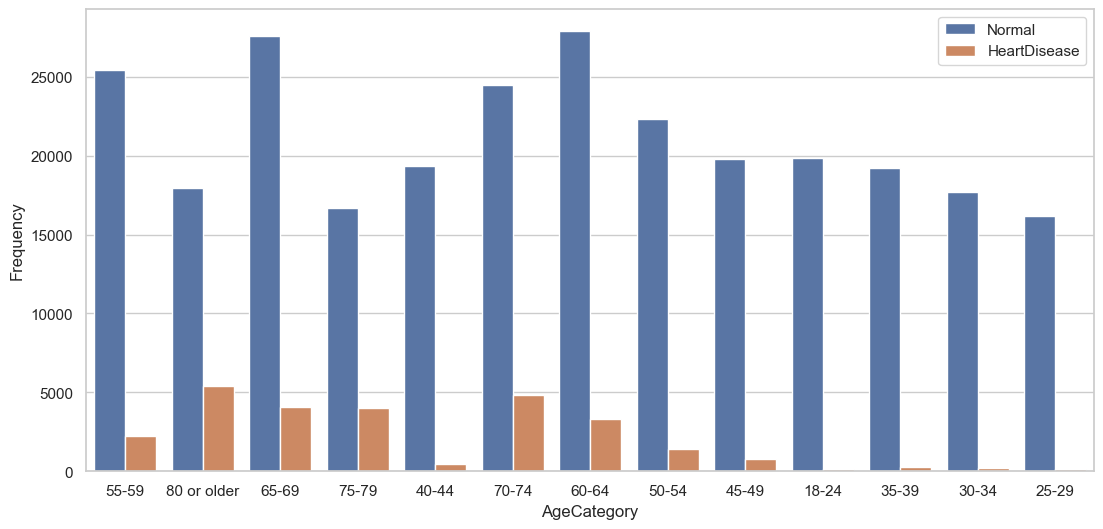

In [26]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'deep')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

Come ci si aspettava, l'età rappresenta un fattore molto importanti nell'insorgere di malattie cardiache; in particolar modo, è possibile notare come la maggior parte dei pazienti soggetti a malattie cardiache presenti un'età superiore ai 60.

## 4. Data cleaning & Preprocessing

Alcuni attributi (AgeCategory, Sex, GenHealth, Race e Diabetic) sono rappresentati mediante delle stringhe e tra questi alcuni (AgeCategory, GenHealth, Race e Diabetic) possono assumere più di due valori, per cui è necessario analizzarli in maniera più approfondita ed eventualmente rappresentarli in maniera più semplice ed efficace ai fini della classificazione.

In [27]:
df_cat=df.select_dtypes(include=["object"])

In [28]:
df_cat.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [29]:
df_cat.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [30]:
df_cat.AgeCategory.value_counts().count()

13

In [31]:
df_cat.GenHealth.value_counts().count()

5

Notiamo come AgeCategory e GenHealth possano assumere rispettivamente 13 e 5 possibili valori diversi.

Analizziamo più nel dettaglio come sono distribuiti tali valori all'interno del dataset.

In [32]:
df_cat.AgeCategory.value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

In [33]:
df_cat.GenHealth.value_counts()

GenHealth
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: count, dtype: int64

Esistono diversi modi per rappresentare GenHealth ed AgeCategory in maniera più efficiente e semplice, ad esempio si potrebbe utilizzare un OneHotEncoder per creare una colonna binaria, ovvero un attributo, per ogni possibile valore assumibile dall'attributo di partenza. Le nuove colonne avranno 1 nella posizione in cui i record assumono quel valore, 0 altrimenti.

In questo caso, si è scelto di rappresentare GenHealth ed AgeCategory come delle variabili ordinali, ovvero si è scelto di introdurre un ordinamento all'interno dei possibili valori assunti da tali attributi. Nel caso di AgeCategory è stato utilizzato l'ordinamento lessicografico, mentre nel caso di GenHealth è stato imposto il seguente ordinamento:
- ["Poor" < "Fair" < "Good" < "Very good" < "Excellent"]

In [34]:
GenHealth_category=["Poor","Fair","Good","Very good","Excellent"]

df.GenHealth = df.GenHealth.astype(CategoricalDtype(ordered=True, categories=GenHealth_category))
df.GenHealth.head()

0    Very good
1    Very good
2         Fair
3         Good
4    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very good' < 'Excellent']

In [35]:
df.AgeCategory = df.AgeCategory.astype(CategoricalDtype(ordered=True))
df.AgeCategory.head()

0          55-59
1    80 or older
2          65-69
3          75-79
4          40-44
Name: AgeCategory, dtype: category
Categories (13, object): ['18-24' < '25-29' < '30-34' < '35-39' ... '65-69' < '70-74' < '75-79' < '80 or older']

L'attributo Diabetic può assumere 4 diversi valori:
- Yes
- No
- No, borderline diabetes
- Yes (during pregnancy)

Anche in questo caso si sarebbe potuto utilizzare un OneHotEncoder o un LabelEncoder; tuttavia, per questioni di semplicità, è stato scelto di semplificare il possibile range di valori e considerare "No, borderline diabetes" come un semplice "No" e "Yes (during pregnancy)" come un "Yes".

In [36]:
encode_Diabetic = {'Yes': True, 'No': False, 'No, borderline diabetes': False, 'Yes (during pregnancy)':True}
df['Diabetic'] = df['Diabetic'].apply(lambda x: encode_Diabetic[x])
df['Diabetic'] = df['Diabetic'].astype('bool')

Per cui il dataset modificato sarà strutturato come segue:

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      301717 non-null  object  
 1   BMI               301717 non-null  float64 
 2   Smoking           301717 non-null  object  
 3   AlcoholDrinking   301717 non-null  object  
 4   Stroke            301717 non-null  object  
 5   PhysicalHealth    301717 non-null  float64 
 6   MentalHealth      301717 non-null  float64 
 7   DiffWalking       301717 non-null  object  
 8   Sex               301717 non-null  object  
 9   AgeCategory       301717 non-null  category
 10  Race              301717 non-null  object  
 11  Diabetic          301717 non-null  bool    
 12  PhysicalActivity  301717 non-null  object  
 13  GenHealth         301717 non-null  category
 14  SleepTime         301717 non-null  float64 
 15  Asthma            301717 non-null  object  
 16  KidneyD

Codifichiamo tutte le feature categoriche in modo da rappresentarle come valori numerici o booleane; questa rappresentazione risulterà particolarmente utile per l'analisi della correlazione tra le feature.

In [38]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

categorical_cols = df.select_dtypes(include=[object,'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301717 non-null  int64  
 1   BMI                                  301717 non-null  float64
 2   Smoking                              301717 non-null  int64  
 3   AlcoholDrinking                      301717 non-null  int64  
 4   Stroke                               301717 non-null  int64  
 5   PhysicalHealth                       301717 non-null  float64
 6   MentalHealth                         301717 non-null  float64
 7   DiffWalking                          301717 non-null  int64  
 8   Sex                                  301717 non-null  int64  
 9   AgeCategory                          301717 non-null  float64
 10  Diabetic                             301717 non-null  bool   
 11  PhysicalActivity  

Una volta rappresentate tutte le feature come valori numerici o come valori booleani, è possibile andare ad analizzare la correlazione tra le varie feature e la classe HeartDisease. Per fare ciò andremo a costruire la matrice di correlazione e a visualizzarla graficamente in modo da osservare più facilmente la correlazione tra le varie feature.

In [39]:
mtxcorr = df.corr()
mtxcorr["HeartDisease"].sort_values(ascending=False)

HeartDisease                           1.000000
AgeCategory                            0.237493
DiffWalking                            0.196420
Stroke                                 0.194665
GenHealth_Poor                         0.172437
Diabetic                               0.170331
PhysicalHealth                         0.165235
GenHealth_Fair                         0.143265
KidneyDisease                          0.142672
Smoking                                0.104524
SkinCancer                             0.090644
Sex                                    0.074435
Race_White                             0.048892
BMI                                    0.047260
Asthma                                 0.035784
GenHealth_Good                         0.031748
MentalHealth                           0.020913
SleepTime                              0.010834
Race_American Indian/Alaskan Native    0.006480
Race_Other                            -0.006076
Race_Black                            -0

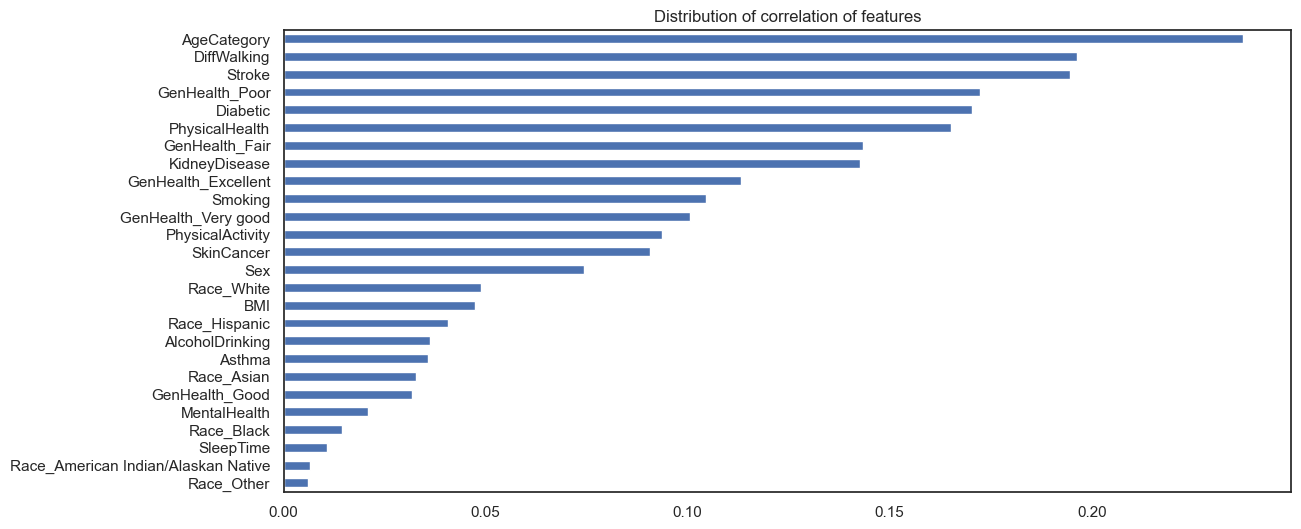

In [40]:
sns.set_style('white')
sns.set_palette('deep')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(mtxcorr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

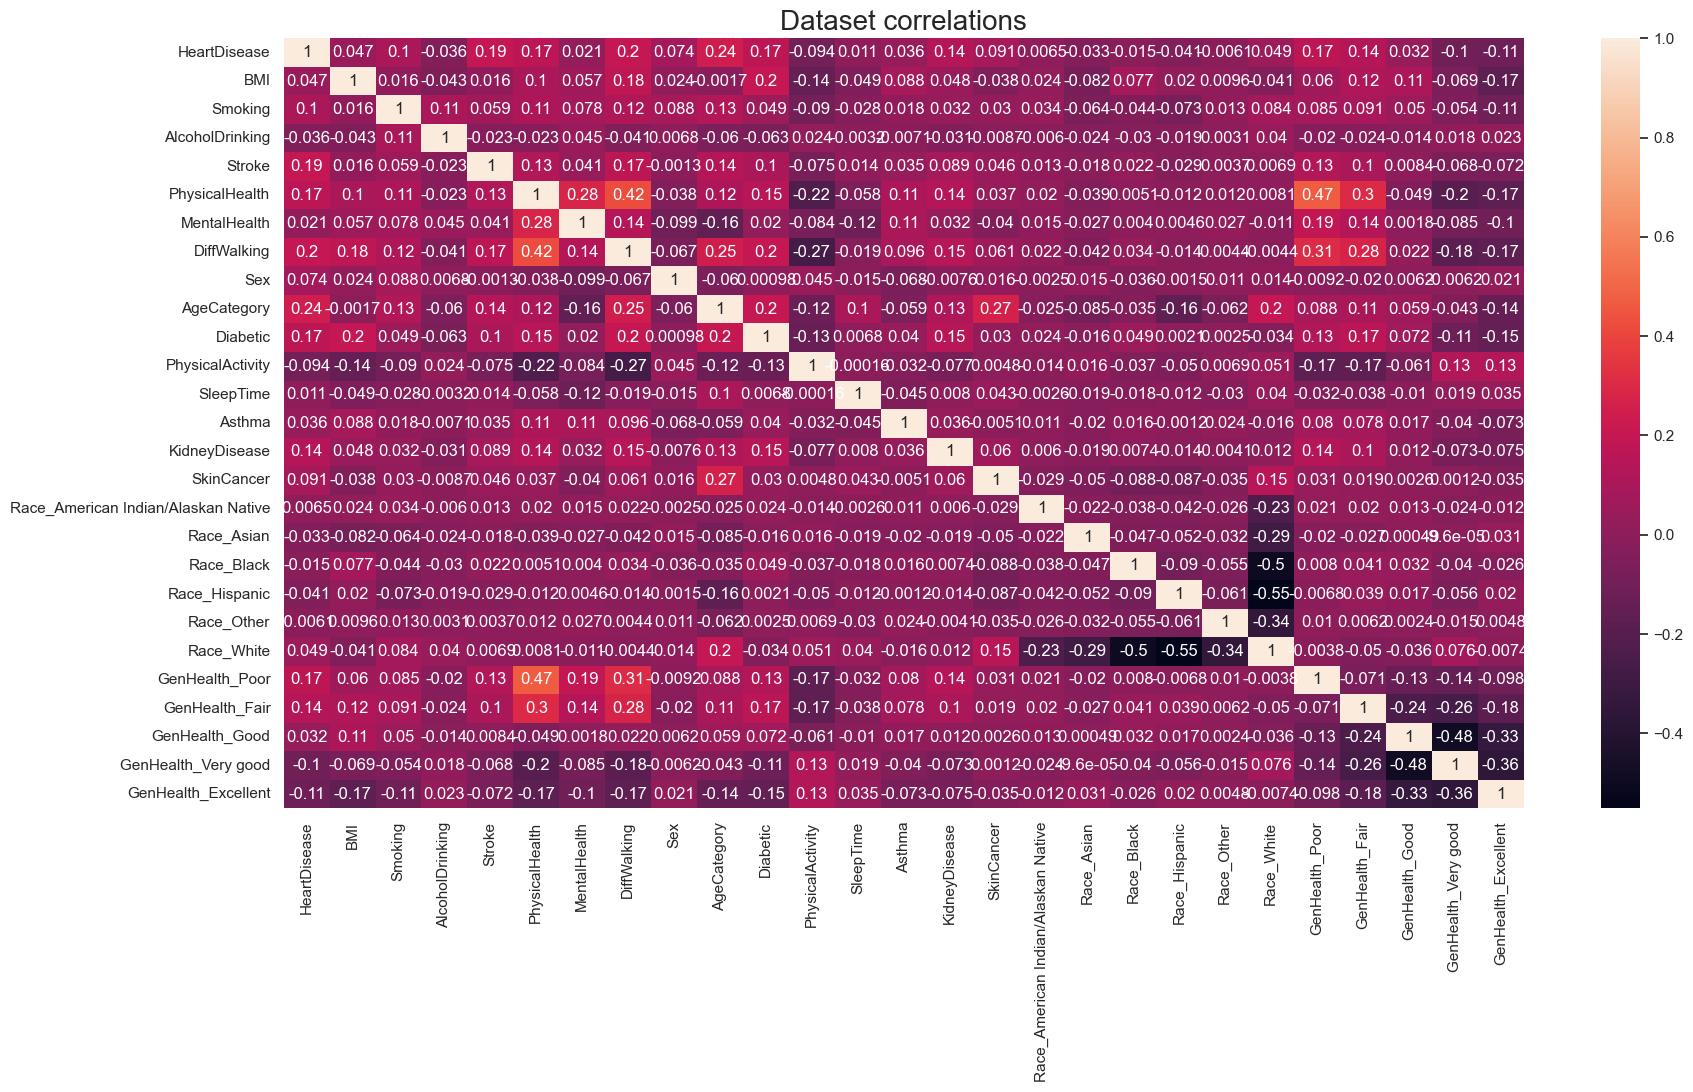

In [41]:
fig,ax = plt.subplots(figsize=(20,10))
fig = sns.heatmap(mtxcorr, annot=True)
plt.title("Dataset correlations", size=20)
plt.show()

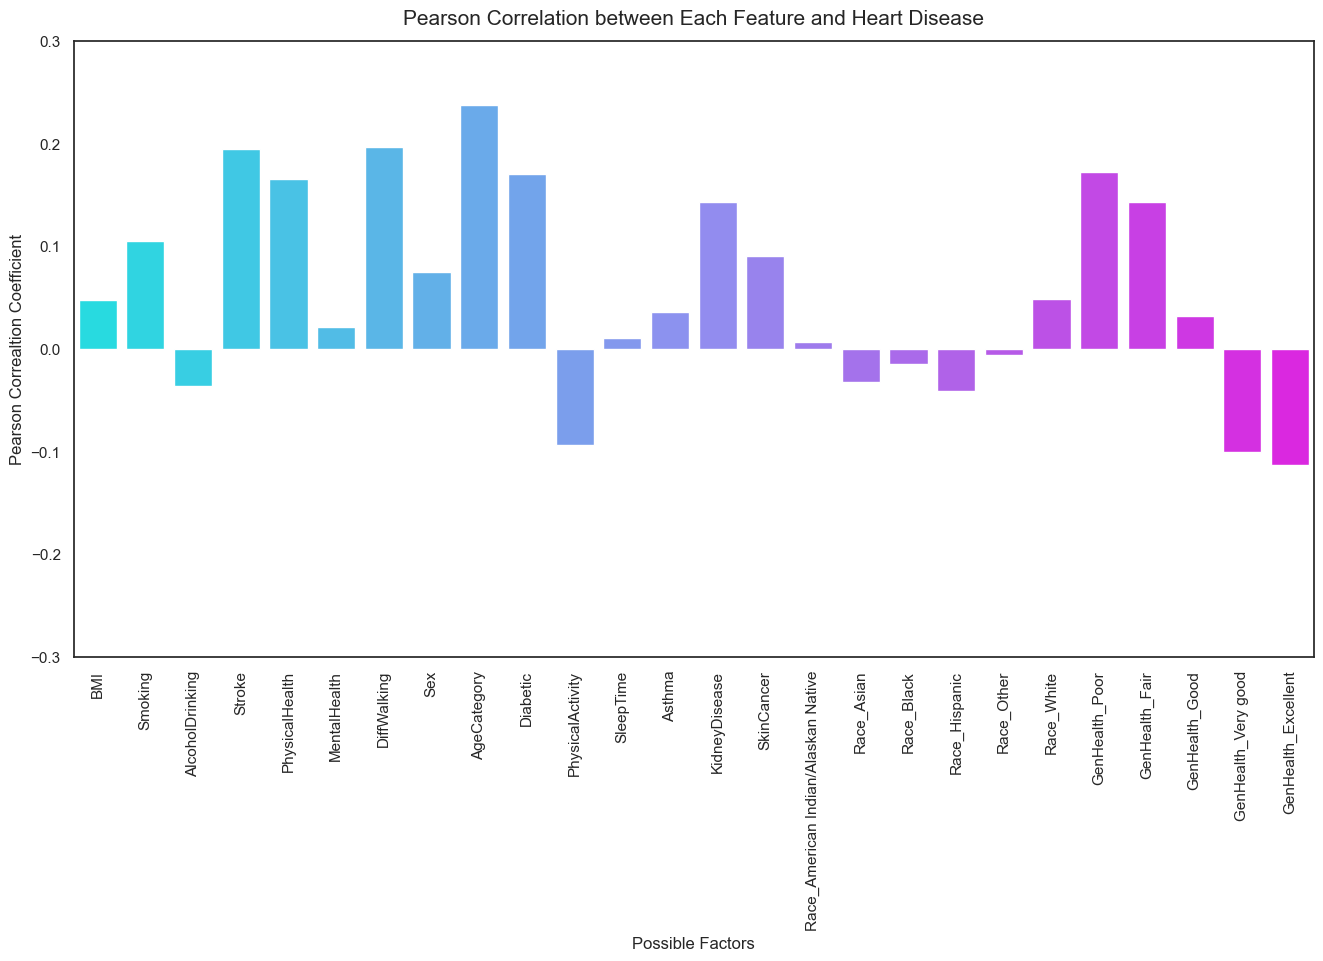

In [42]:
corr_ft_hd_x = list(mtxcorr.columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(mtxcorr["HeartDisease"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y, palette= "cool")
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Possible Factors",
               ylabel= "Pearson Correaltion Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")

plt.show()

Notiamo come le feature SleepTime e MentalHealth abbiano pochissima correlazione con HeartDisease, ad indicare che l'attributo target non è influenzato da esse. Mentre possiamo notare come DiffWalking, AgeCategory, Stroke e GenHealth_Poor siano le feature che presentano maggiore correlazione con HeartDisease, per cui rappresentano i fattori che influenzano maggiormente l'insorgere di malattie cardiache.

## 5. Metodi di classificazione
L'obiettivo di questa fase è addestrare diversi modelli per poi metterli a confronto e scegliere quale tra questi risulta essere il più adatto alla classificazione dei nostri dati.

I modelli che verranno presi in considerazione sono:
- Logistic Regression
- Gaussian Naive Bayes
- Decision Tree
- Random Forest
- Extra Trees
- SGD Classifier
- XGBoost Classifier
- AdaBoost Classifier
- Voting Classifier
- Bagging Classifier
- Reti Neurali multi livello

Il procedimento che verrà seguito per ogni modello di classificzione è il seguente:
- Addestramento del modello
- Valutazione delle performance del modello con diverse metriche di valutazione quali: Confusion Matrix, Accuracy, Precision, Recall, F-measure, ROC Curve

Una volta individuati i migliori modelli si procederà alla loro ottimizzazione del modello tramite Grid Search.

Al fine di comprendere meglio i risultati delle analisi, è opportuno andare a descrivere le diverse metriche che verranno utiizzate per la valutazione del modello.

#### Confusion Matrix
Questo approccio è il più semplice per andare a valutare la qualità di un metodo di classificazione. Tale matrice presenta i seguenti indicatori:
- TP: true positiva, ovvero i record positivi correttamente classificati
- FN: false negative, i record positivi non classificati correttamente
- FP: false positive, numero di record negativi non correttamente classificati
- TN: true negative, numero di record negativi correttamente classificati

#### Accuracy
Tale metrica è in grado di sintetizzare le infromazioni della confusion matrix ed è definita come segue: $$\begin{equation} Accuracy = \frac{TP+TN}{TP+FN+FP+TN} = \frac{\text{record correttamente classificati}}{\text{record totali}} \end{equation}$$

#### Precision
Misura la frazione di record effettivamente positivi tra tutti quelli che sono stati classificati come tali: $$\begin{equation} Precision = \frac{TP}{TP+FP} \end{equation}$$

#### Recall
Misura la frazione di record positivi correttamente cassificati: $$\begin{equation} Recall = \frac{TP}{TP+FN} \end{equation}$$

#### F-measure
Si tratta della media armonica tra Precision e Recall ed è espressa come segue: $$\begin{equation} F-measure = \frac{2pr}{p+r} \end{equation}$$

#### ROC
Si tratta di un modo per visualizzare e valutare le prestazioni di un classificatore binario in modo intuitivo, fornendo una rappresentazione grafica del compromesso tra True Positive Rate (TPR, frazione di veri positivi) e False Positive Rate (FPR, frazione di falsi positivi).

Nonostante la misura di valutazione a cui noi vogliamo dare più peso è la F-measure, utilizzeremo anche le altre metriche di valutazione per aver una visione più generale e completa delle prestazioni dei singoli modelli.

### 5.1 Analisi del bilanciamento delle classi

Procediamo ora con una verifica preliminare sul bilanciamento delle classi. Ciò è necessario per due motivi principali:
- Solitamente i metodi di classificazione funzionano meglio se il dataset è bilanciato.
- Alcune metriche di valutazione non risultano essere adatte alla valutazione della bontà del modello.

Fatte queste premesse andiamo a verificare se le classi sono bilanciate.

In [43]:
percentuali_di_bilanciamento = df['HeartDisease'].value_counts(normalize=True) * 100
print(percentuali_di_bilanciamento )

HeartDisease
0    90.964712
1     9.035288
Name: proportion, dtype: float64


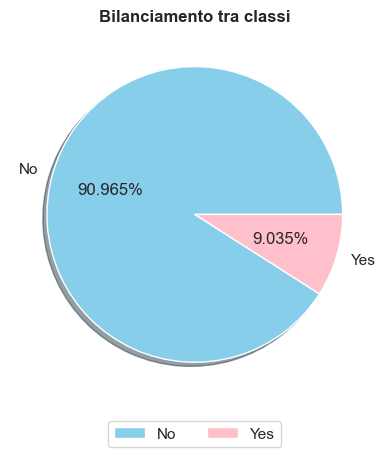

In [44]:
labels = ['No', 'Yes']

plt.pie([percentuali_di_bilanciamento[0],percentuali_di_bilanciamento[1] ] ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Bilanciamento tra classi', fontweight = 'bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()

Come possiamo vedere dal grafico vi è un notevole sbilanciamento delle classi e ciò potrebbe degradare notevolmente l'accuratezza e le performance della nostra classificazione. Dunque, è neccessario bilanciare il dataset al fine di garantire un corretto ed efficiente funzionamento dei nostri modelli; è possibile fare ciò utilizzando un metodo di campionamento. I due metodi di campionamento principali sono:
- Oversampling: tale metodo consiste nell'aggiunta di nuovi record al dataset.
- Undersampling: questo approccio invece consiste nell'andare ad eliminare record dai dati.

Al fine di mostrare l'influenza di classi sbilanciate sui classificatori, verrà prima mostrato un esempio di addestramento del modello con dataset sbilanciato; successivamente, verranno implementati i metodi di campionamento e si mostreranno i miglioramenti che essi portano sui classificatori. Tutti i successivi classificatori verranno addestrati e analizzati usando il dataset bilanciato mediante oversampling.

### 5.2 Creazione del training set e test set

Per poter andare ad allenare i modelli innanzitutto dividiamo il dataset in due parti:
- X: rappresenta tutti i dati tranne la colonna della variabile target.
- Y: è la colonna contenente tutti i valori della variabile target.

In [45]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

Suddiviamo il dataset in training set e test set

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.70,random_state=42)

Definiamo una funzione per valutare il modello

In [47]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
 
    y_pred = model.predict(x_test)

    cr = metrics.classification_report(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'cr': cr, 'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [48]:
def show(model_eval):
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import RocCurveDisplay

  _, axes = plt.subplots(1, 2, figsize=(12, 4))

  ConfusionMatrixDisplay(model_eval['cm']).plot(ax=axes[0])
  RocCurveDisplay(fpr=model_eval['fpr'], tpr=model_eval['tpr'], roc_auc=model_eval['auc']).plot(ax=axes[1])
  axes[0].set_title('Confusion Matrix')
  axes[1].set_title('Curva ROC')
  plt.tight_layout()
  plt.show()

### 5.3 Addestramento del modello con dataset sbilanciato e con dataset bilanciato

Definiamo un DataFrame in cui per ogni modello andremo a memorizzarne le metriche.

In [49]:
dataResults = pd.DataFrame(columns=['Accuracy', 'Recall','Precision', 'F1 Score'])
print(dataResults.head())

def save(dataFr, name, accuracy, recall, precision, F1score):
    new_values = [accuracy, recall, precision, F1score]
    dataFr.loc[name] = new_values

Empty DataFrame
Columns: [Accuracy, Recall, Precision, F1 Score]
Index: []


RandomForest è un insieme di alberi decisionali  che cooperano secondo una logica di bagging, in cui ciascun albero decisionale è addestrato utilizzando una porzione del training set originario. Inoltre, quando si divide un nodo durante la costruzione dell'albero, la divisione scelta non è più la migliore suddivisione ma la migliore suddivisione tra un sottoinsieme casuale delle caratteristiche. Poichè ogni albero lavora e formula le proprie ipotesi indipendentemente dagli altri, la predizione, nel caso di Classification Tree, è pari al valore discreto più "ipotizzato”; mentre, nel caso di Regression Tree, è pari alla media delle ipotesi formulate.

I vantaggi dell'algoritmo sono:
- Riduzione dell'overfitting, grazie dall'utilizzo di diversi classificatori ad albero.
- Minore varianza: utilizzando più alberi, si riduce la possibilità di costruire un classificatore con cattive performance a causa della relazione tra il training set e il test set.

Gli svantaggi, invece, sono:
- Alta complessità del modello.
- Difficoltà nella visualizzazione del modello e nello studio dello stesso.
- Difficoltà di implementazione.


**Primo caso**: classificazione con dataset sbilanciato

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
x_trn_imb_scaled = scaler.fit_transform(x_train)
x_tst_imb_scaled = scaler.transform(x_test)

rfc_imb = RandomForestClassifier(n_estimators=30, max_depth=10, max_features = 'sqrt',random_state=42)

rfc_imb.fit(x_trn_imb_scaled, y_train)
rfc_imb_eval = evaluate_model(rfc_imb, x_tst_imb_scaled, y_test)

save(dataResults, "Random Forest (Imbalanced)", rfc_imb_eval['acc'], rfc_imb_eval['rec'], rfc_imb_eval['prec'], rfc_imb_eval['f1'])

features_imb = rfc_imb.feature_importances_

print("Random Forest Classifier (Imbalanced Dataset)")
print("Classification Report:\n")
print(rfc_imb_eval['cr'])

Random Forest Classifier (Imbalanced Dataset)
Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     82383
           1       0.61      0.04      0.07      8133

    accuracy                           0.91     90516
   macro avg       0.76      0.52      0.51     90516
weighted avg       0.89      0.91      0.87     90516



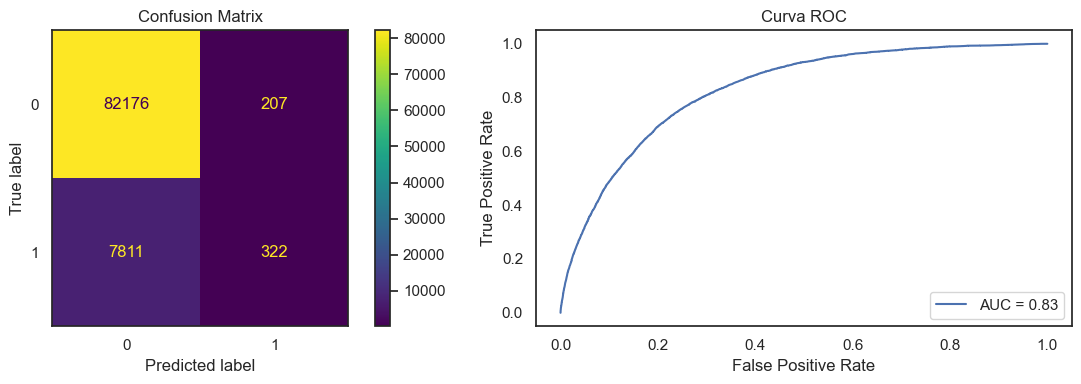

In [51]:
show(rfc_imb_eval)

**Secondo caso**: classificazione con dataset bilanciato mediante la tecnica di oversampling (SMOTE)

In [52]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

print(f'No. of records before using SMOTE\n{y.value_counts()}\n')
print(f'No. of records after using SMOTE\n{y_resampled.value_counts()}')

No. of records before using SMOTE
HeartDisease
0               274456
1                27261
Name: count, dtype: int64

No. of records after using SMOTE
HeartDisease
0               274456
1               274456
Name: count, dtype: int64


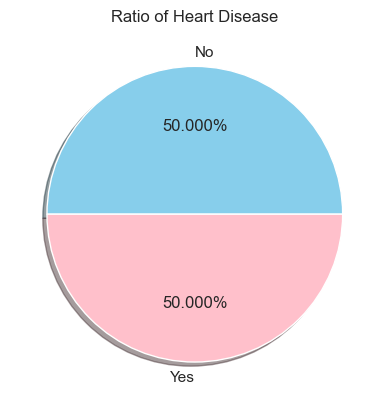

In [53]:
plt.pie(x = y_resampled.value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [55]:
rfc_ovr = RandomForestClassifier(n_estimators=30, max_depth=10, max_features = 'sqrt',random_state=42)

rfc_ovr.fit(x_train_scaled,Y_train)
y_ovr_pred = rfc_ovr.predict(x_test_scaled)

features_ovr = rfc_ovr.feature_importances_

rfc_ovr_eval = evaluate_model(rfc_ovr, x_test_scaled, Y_test)

save(dataResults, "Random Forest (Oversampling)", rfc_ovr_eval['acc'], rfc_ovr_eval['rec'], rfc_ovr_eval['prec'], rfc_ovr_eval['f1'])

print("Random Forest Classifier (Oversampling)")
print("Classification Report:\n")
print(rfc_ovr_eval['cr'])

Random Forest Classifier (Oversampling)
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.79      0.82     54903
           1       0.80      0.85      0.83     54880

    accuracy                           0.82    109783
   macro avg       0.82      0.82      0.82    109783
weighted avg       0.82      0.82      0.82    109783



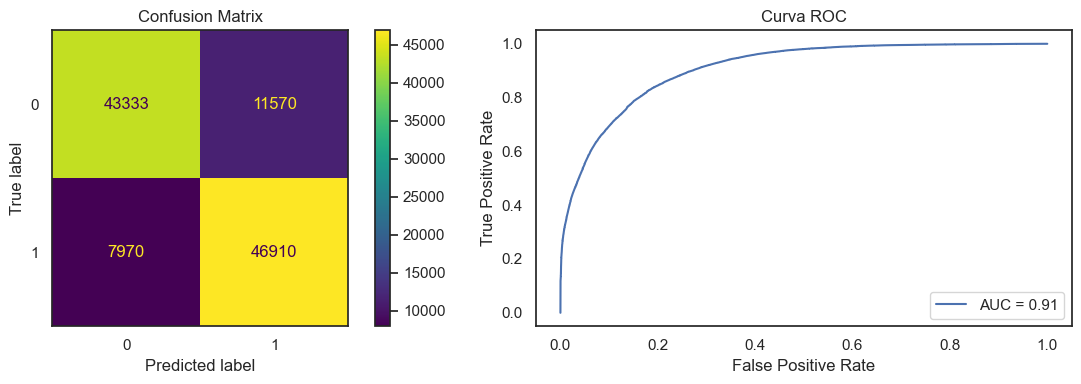

In [56]:
show(rfc_ovr_eval)

**Terzo caso**: dataset bilanciato mediante tecnica di undersampling

In [57]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids


cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)

X_res, y_res = cc.fit_resample(x, y)
print(f'No. of records before using ClusterCentroids\n{y.value_counts()}\n')
print(f'No. of records after using ClusterCentroids\n{y_res.value_counts()}')

No. of records before using ClusterCentroids
HeartDisease
0               274456
1                27261
Name: count, dtype: int64

No. of records after using ClusterCentroids
HeartDisease
0               27261
1               27261
Name: count, dtype: int64


In [58]:
x_trn_und, x_tst_und, y_trn_und, y_tst_und = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_trn_und_scaled = scaler.fit_transform(x_trn_und)
x_tst_und_scaled = scaler.transform(x_tst_und)

In [59]:
rfc_und = RandomForestClassifier(n_estimators=30, max_depth=10, max_features = 'sqrt',random_state=42)

rfc_und.fit(x_trn_und_scaled,y_trn_und)
y_und_pred = rfc_und.predict(x_tst_und_scaled)

features_und = rfc_und.feature_importances_

rfc_und_eval = evaluate_model(rfc_und, x_tst_und_scaled, y_tst_und)

save(dataResults, "Random Forest (Undersampling)", rfc_und_eval['acc'], rfc_und_eval['rec'], rfc_und_eval['prec'], rfc_und_eval['f1'])

print("Random Forest Classifier (Undersampling)")
print("Classification Report:\n")
print(rfc_und_eval['cr'])

Random Forest Classifier (Undersampling)
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      5438
           1       0.73      0.82      0.77      5467

    accuracy                           0.75     10905
   macro avg       0.76      0.75      0.75     10905
weighted avg       0.76      0.75      0.75     10905



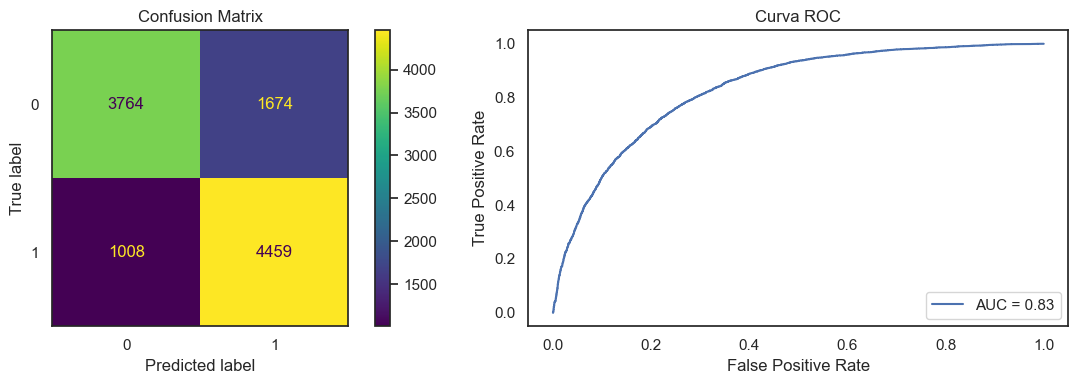

In [60]:
show(rfc_und_eval)

In [61]:
dataResults.head()

Accuracy    Recall  Precision  F1 Score
Random Forest (Imbalanced)     0.911419  0.039592   0.608696  0.074348
Random Forest (Oversampling)   0.822013  0.854774   0.802155  0.827629
Random Forest (Undersampling)  0.754058  0.815621   0.727050  0.768793

In [62]:
def confronto_metriche(df_risultati):

    df_tidy = df_risultati.copy()
    
    df_tidy = df_risultati.reset_index().melt(id_vars='index', var_name='Metrica', value_name='Valore')
    
    plt.figure(figsize=(15,10))
    sns.barplot(x='index', y='Valore', hue='Metrica', data=df_tidy, palette='deep', edgecolor='black')
    plt.xlabel('Metrica')
    plt.ylabel('Valore')
    plt.title('Confronto delle metriche')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., ncol=1)

    plt.show()


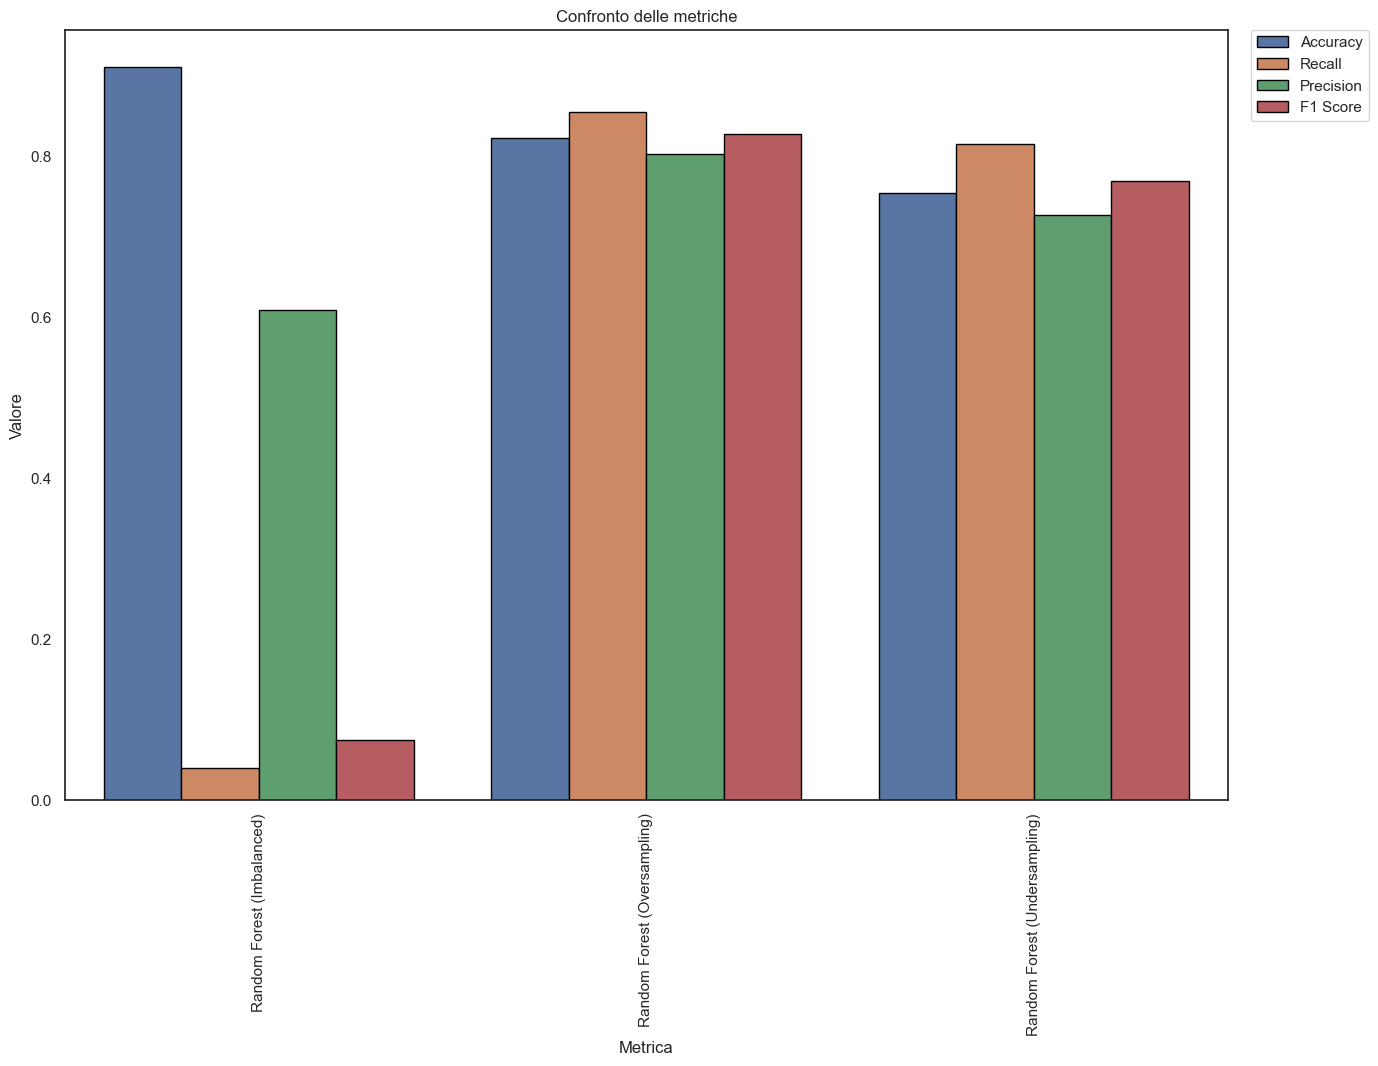

In [63]:
confronto_metriche(dataResults)

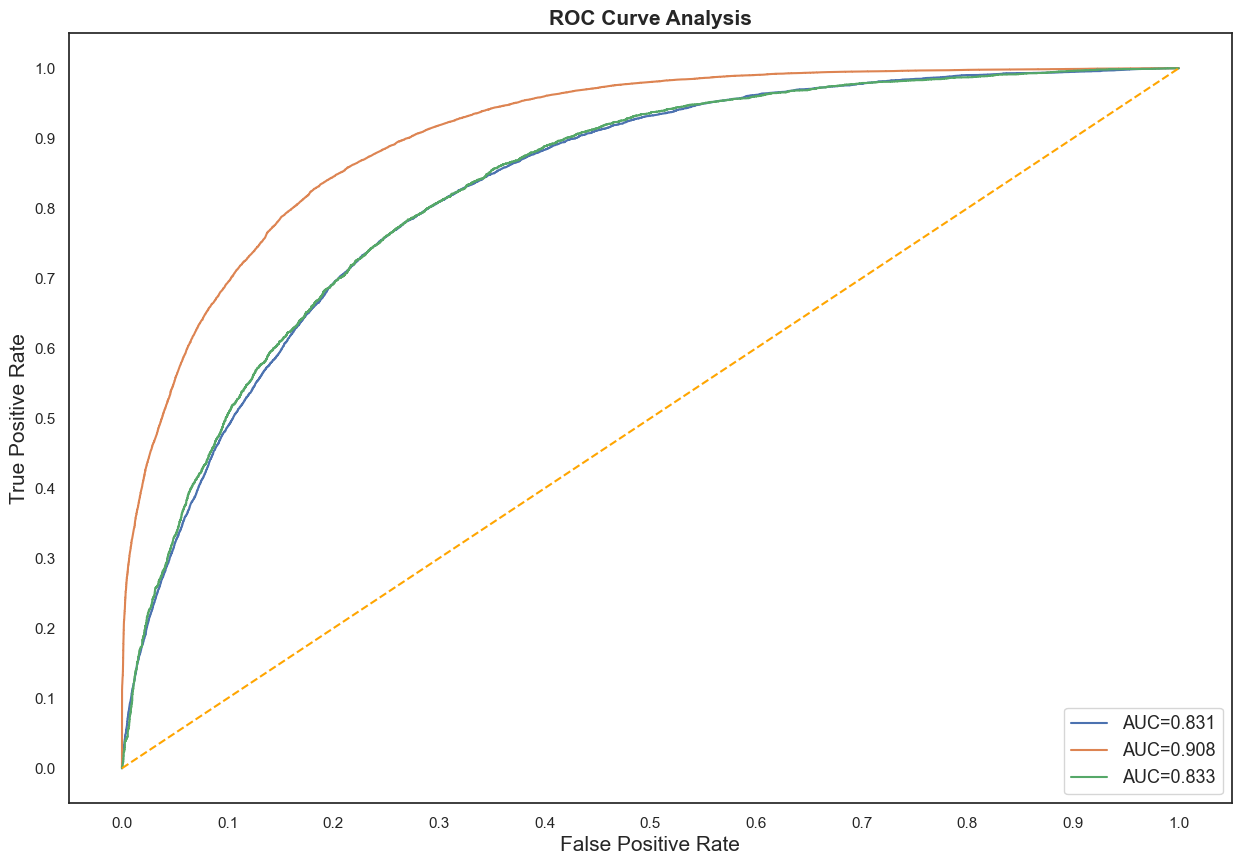

In [64]:
models_eval = [rfc_imb_eval, rfc_ovr_eval, rfc_und_eval]

fig = plt.figure(figsize=(15,10))

for eval in models_eval:
    plt.plot(eval['fpr'], 
             eval['tpr'], 
             label="AUC={:.3f}".format(eval['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Possiamo notare come il classificatore addestrato sul dataset bilanciato mediante oversampling abbia migliori prestazioni rispetto ai classificatori addestrati sul dataset sbilanciato o sul dataset bilanciato mediante undersampling.

Un rischio che si corre utilizzando la tecnica è l'aumento della probabilità di andare in overfitting. L'overfitting è la condizione per cui il nostro modello si adattta perfettamente ai dati del training set, avendo quindi un errore di training molto basso, ma non riesce a classificare correttamente i nuovi dati provenienti da fonti esterne (errore di test molto alto).

### 5.4 Addestramento dei modelli con dataset bilanciato

#### 5.4.1 SGDClassifier

L'algoritmo di classificazione della discesa del gradiente stocastica (Stochastic Gradient Descent, SGD) è un metodo di ottimizzazione ampiamente utilizzato per addestrare modelli di classificazione; l'obiettivo principale dell'algoritmo è quello di minimizzare una funzione di perdita che misura la discrepanza tra le previsioni del modello e i valori target.

La funzione di perdita concreta può essere impostata tramite il parametro 'loss'. Tra le funzioni di perdita supportate da SGDClassifier si hanno:
- loss="hinge": (soft-margin) linear Support Vector Machine
- loss="modified_huber": smoothed hinge loss
- loss="log_loss": logistic regression

I vantaggi di Stochastic Gradient Descent sono:

- Efficienza
- Facilità di implementazione
- Ottimizzazione del codice

Gli svantaggi di SGD sono:

- Richiede numerosi iperparametri come il parametro di regolarizzazione e il numero di iterazioni.
- È sensibile al ridimensionamento.

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss='log_loss', penalty='l1', learning_rate = 'constant', random_state = 42, eta0 = 0.01)
sgd.fit(x_train_scaled, Y_train)
sgd_clf = CalibratedClassifierCV(sgd, cv='prefit')
sgd_clf.fit(x_train_scaled, Y_train)

name = "SGDClassifier"

sgd_eval = evaluate_model(sgd_clf, x_test_scaled, Y_test)

save(dataResults, name, sgd_eval['acc'], sgd_eval['rec'], sgd_eval['prec'], sgd_eval['f1'])

print("SGD Classifier")
print("Classification Report:\n")
print(sgd_eval['cr'])

SGD Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     54903
           1       0.83      0.82      0.83     54880

    accuracy                           0.83    109783
   macro avg       0.83      0.83      0.83    109783
weighted avg       0.83      0.83      0.83    109783



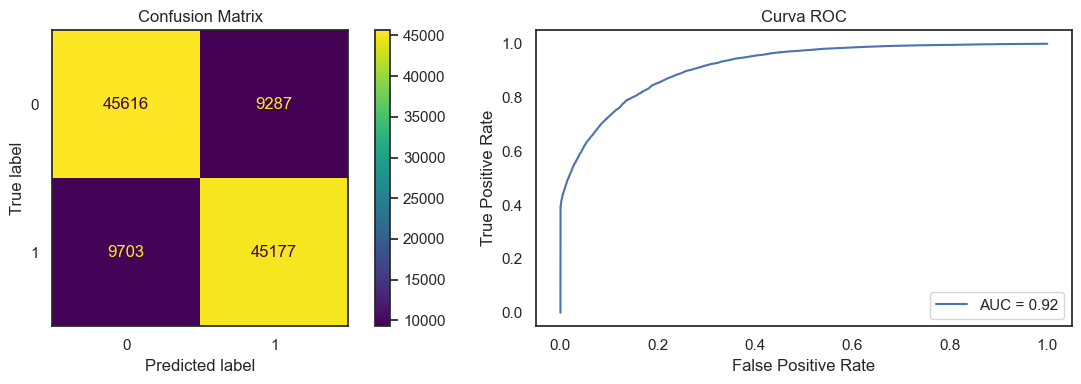

In [66]:
show(sgd_eval)

#### 5.4.2 K-Nearest Neighbors Classifier
Si tratta di un algoritmo, di tipo supervisionato, che, dato un punto da classificare, sfrutta le caratteristiche degli oggetti più vicini a tale punto per effettuare la classificazione. La classificazione è calcolata tramite un voto di maggioranza dei punti più vicini, viene assegnata la classe al punto considerato grazie alla classe dei k rappresentanti più vicini. Il vantaggio principale è che non richiede la costruzione di un modello.

Lo svantaggio principale dell'algoritmo KNN è che appartiene alla famiglia di algoritmi detti "lazy Learner", cioè non apprende dal training set ma lo utilizza semplicemente per effettuare la classificazione. Per prevedere l'etichetta di una nuova istanza, l'algoritmo KNN troverà i vicini più vicini K alla nuova istanza dai dati di addestramento, l'etichetta di classe prevista verrà quindi impostata come l'etichetta più comune tra i punti vicini K più vicini. Lo svantaggio principale di questo approccio è che l'algoritmo deve calcolare la distanza e ordinare il training set a ogni previsione. Inoltre, poiché la classe è determinata localmente, KNN risulta essere piuttosto suscettibile al rumore e alla presenza di dati con attributi irrilevanti, che potrebbero falsifiare le distanze tra gli oggetti.

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=100, weights='uniform', leaf_size=30)

knn_clf.fit(x_train_scaled,Y_train)

name = "K-Nearest Neighbors "

knn_eval = evaluate_model(knn_clf, x_test_scaled, Y_test)

save(dataResults, name, knn_eval['acc'], knn_eval['rec'], knn_eval['prec'], knn_eval['f1'])

print(name)
print("Classification Report:\n")
print(knn_eval['cr'])

K-Nearest Neighbors 
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     54903
           1       0.81      0.85      0.83     54880

    accuracy                           0.83    109783
   macro avg       0.83      0.83      0.83    109783
weighted avg       0.83      0.83      0.83    109783



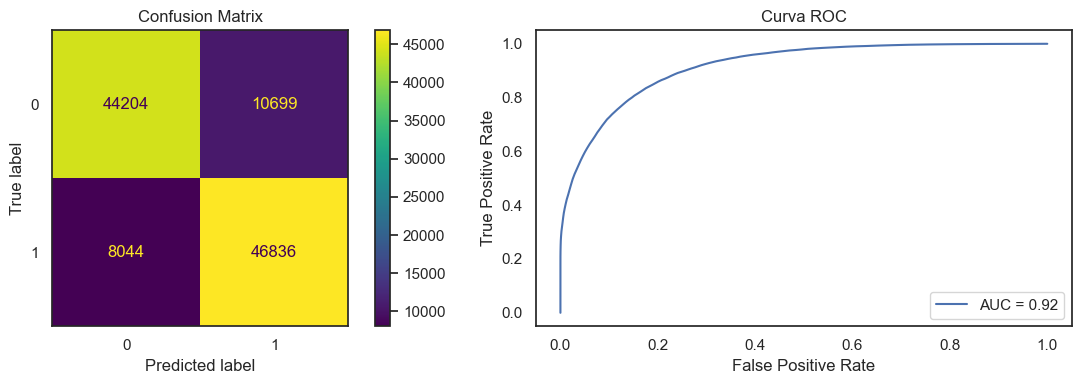

In [68]:
show(knn_eval)

### 5.4.3 Decision Tree Classifier
Metodo di apprendimento supervisionato che sfrutta le caratteristiche dei dati per costruire regole decisionali con cui dividere ricorsivamente l'insieme di dati in sottoinsiemi sempre più omogenei fino a quando non si ottiene una classificazione finale. Durante il processo di apprendimento, gli alberi decisionali cercano di massimizzare la purezza delle classi all'interno di ciascun sottoinsieme. I vantaggi principali sono:
- Interpretabilità: gli alberi decisionali sono modelli altamente interpretabili. La struttura ad albero rende facile comprendere e visualizzare le decisioni prese dal modello.
- Gestione automatica delle variabili: si tratta di modelli in grado di gestire automaticamente le variabili senza richiedere una preparazione complessa dei dati come la normalizzazione o la standardizzazione delle variabili.
- Robustezza: gli aberi decisionali sono molto robusti rispetto alla presenza di attributi fortemente correlati

Gli svantaggi degli alberi decisionali includono:
- I costruttori possono creare alberi troppo complessi che non generalizzano bene i dati, quindi overfitting.
- Gli alberi decisionali possono essere instabili perché piccole variazioni nei dati potrebbero causare la generazione di un albero completamente diverso.
- Il problema dell'apprendimento di un albero decisionale ottimale è noto per essere NP-completo sotto diversi aspetti dell'ottimalità e persino per concetti semplici. Di conseguenza, gli algoritmi pratici di apprendimento delle decisioni sono basati su algoritmi euristici di tipo greedy in cui vengono prese decisioni localmente ottimali su ciascun nodo.
- I costruttori degli alberi decisioniali producono alberi distorti se dominano alcune classi, per cui potrebbe essere necessario bilanciare il dataset prima della costruzione dell'albero.

In [69]:
from sklearn.tree import DecisionTreeClassifier

dc_clf = DecisionTreeClassifier(criterion='gini', splitter='best')
dc_clf.fit(x_train_scaled,Y_train)

name = "Decision Tree"

dc_eval = evaluate_model(dc_clf, x_test_scaled, Y_test)

save(dataResults, name, dc_eval['acc'], dc_eval['rec'], dc_eval['prec'], dc_eval['f1'])

print(name)
print("Classification Report:\n")
print(dc_eval['cr'])

Decision Tree
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     54903
           1       0.88      0.89      0.89     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783



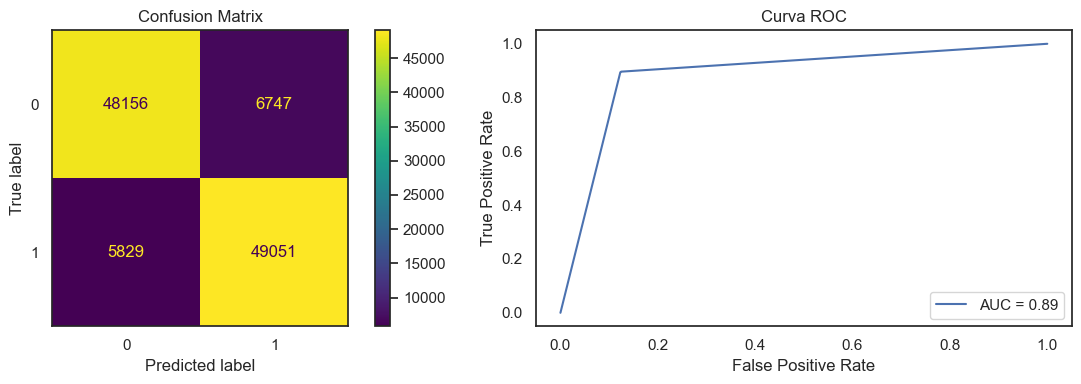

In [70]:
show(dc_eval)

#### 5.4.4 Logistic Regression
Si tratta di un modello di regressione che può essere usato anche per la classificazione. La Logistic Regression (chiamata anche Logit Regression) viene utilizzata per stimare la probabilità che un’istanza appartenga a una particolare classe. Un modello di Logistic Regression calcola una somma ponderata delle feature di input (più un termine bias), ma invece di restituire il risultato direttamente, restituisce la logistica di questo risultato.
I vantaggi nell'utilizzare tale modello sono:

- È facilmente interpretabile: produce probabilità di appartenenza a una classe, che possono essere interpretate come la "confidenza" del modello nella previsione.
- È computazionalmente efficiente ed è in grado di gestire anche grandi quantità di dati in maniera efficiente.
- Fornisce stime delle probabilità.
- È in grado di affrontare il problema di sbilanciamento delle classi.

In [71]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 42, solver = 'liblinear' , penalty = 'l2')
lr_clf.fit(x_train_scaled,Y_train)

name = "Logistic Regression"

lr_eval = evaluate_model(lr_clf, x_test_scaled, Y_test)

save(dataResults, name, lr_eval['acc'], lr_eval['rec'], lr_eval['prec'], lr_eval['f1'])

print(name)
print("Classification Report:\n")
print(lr_eval['cr'])

Logistic Regression
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     54903
           1       0.83      0.82      0.83     54880

    accuracy                           0.83    109783
   macro avg       0.83      0.83      0.83    109783
weighted avg       0.83      0.83      0.83    109783



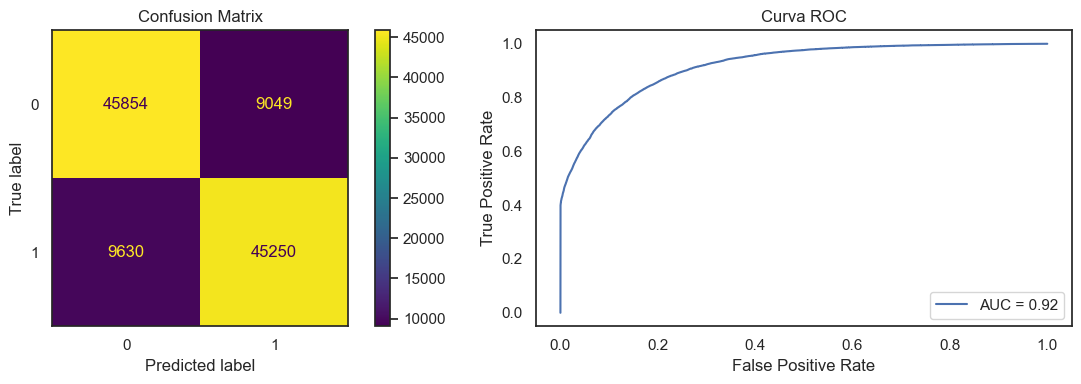

In [72]:
show(lr_eval)

#### 5.4.5 ExtraTressClassifier
ExtraTrees Classifier è un metodo ensemble che combina più alberi decisionali randomizzati. Seleziona in modo casuale sottoinsiemi di caratteristiche e punti di divisione, il che aumenta la diversità e previene l'overfitting. Aggrega le previsioni dei singoli alberi per fare la previsione finale.

In [73]:
from sklearn.ensemble import *

xt_clf = ExtraTreesClassifier(random_state=42, class_weight='balanced_subsample')
xt_clf.fit(x_train_scaled,Y_train)

name = "ExtraTrees Classifier"

xt_eval = evaluate_model(xt_clf, x_test_scaled, Y_test)

save(dataResults, name, xt_eval['acc'], xt_eval['rec'], xt_eval['prec'], xt_eval['f1'])

print(name)
print("Classification Report:\n")
print(xt_eval['cr'])

ExtraTrees Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     54903
           1       0.91      0.91      0.91     54880

    accuracy                           0.91    109783
   macro avg       0.91      0.91      0.91    109783
weighted avg       0.91      0.91      0.91    109783



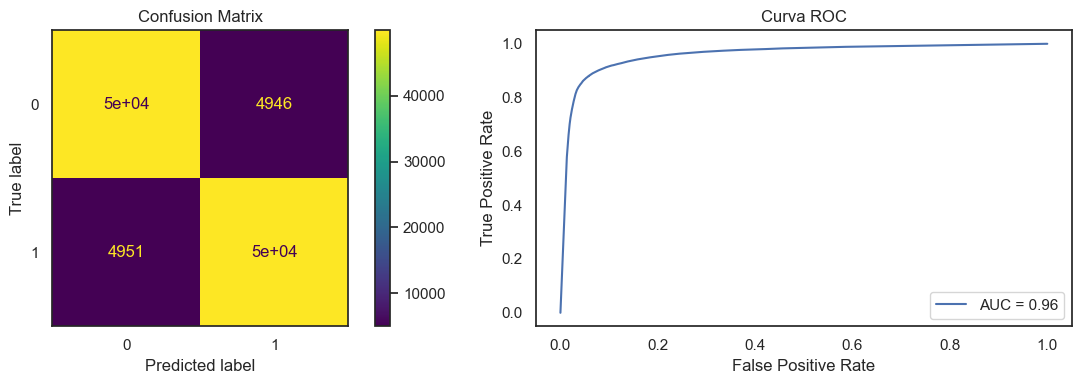

In [74]:
show(xt_eval)

#### 5.4.6 Naive Bayes Classifier
I classificatori Naive Bayes sono una famiglia di "classificatori probabilistici" basati sull'applicazione del teorema di Bayes con ipotesi di indipendenza forte (naive) tra le caratteristiche.

I classificatori Naive Bayes sono altamente scalabili e richiedono un numero di parametri lineare nel numero di variabili (caratteristiche/predittori) in un problema di apprendimento. Si tratta di classificatori molto robusti rispetto al rumore e in grado di gestire in maniera efficiente valori mancanti (semplicemente ignorando l'istanza durante il calcolo delle stime di probabilità).

Tuttavia, poiché l'assunzione di indipendenza condizionale su cui si basano non è sempre valida, potrebbe essere necessario applicare tecniche alternative, come le Bayesian Belief Networks, per gestire altre tipologie di indipendenza.

In [75]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(x_train_scaled,Y_train)

name = "Guassian Naive Bayes Classifier"

gnb_eval = evaluate_model(gnb_clf, x_test_scaled, Y_test)

save(dataResults, name, gnb_eval['acc'], gnb_eval['rec'], gnb_eval['prec'], gnb_eval['f1'])

print(name)
print("Classification Report:\n")
print(gnb_eval['cr'])

Guassian Naive Bayes Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     54903
           1       0.74      0.72      0.73     54880

    accuracy                           0.74    109783
   macro avg       0.74      0.74      0.74    109783
weighted avg       0.74      0.74      0.74    109783



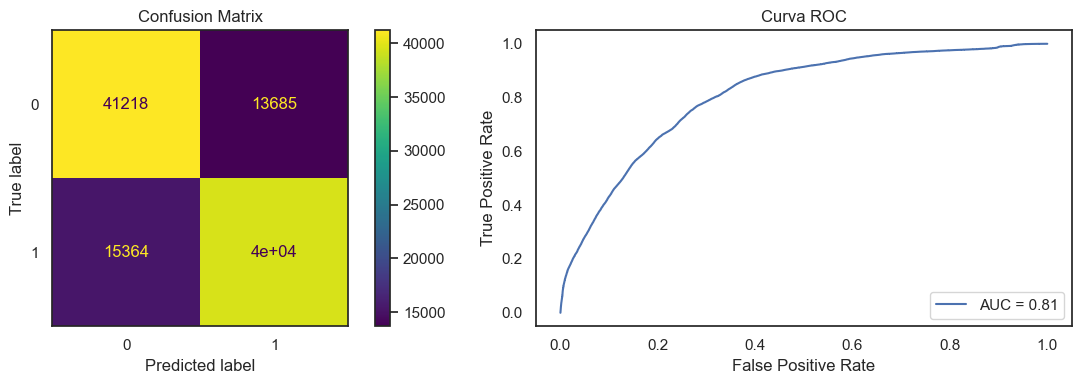

In [76]:
show(gnb_eval)

#### 5.4.7 XGBoost Classifier
XGBoost (Extreme Gradient Boosting) è un metodo di ensemble che combina le previsioni di più alberi decisionali per fare previsioni accurate. L'algoritmo utilizza l'ottimizzazione della discesa del gradiente per ridurre al minimo una funzione di perdita e costruisce in sequenza l'insieme di alberi, concentrandosi sulla correzione degli errori commessi dagli alberi precedenti. XGBoost incorpora tecniche di regolarizzazione per prevenire l'overfitting e fornisce una misura dell'importanza delle funzionalità.

In [77]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train_scaled,Y_train)

name = "XGBoost Classifier"

xgb_eval = evaluate_model(xgb_clf, x_test_scaled, Y_test)

save(dataResults, name, xgb_eval['acc'], xgb_eval['rec'], xgb_eval['prec'], xgb_eval['f1'])

print(name)
print("Classification Report:\n")
print(xgb_eval['cr'])

XGBoost Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     54903
           1       0.91      0.88      0.89     54880

    accuracy                           0.90    109783
   macro avg       0.90      0.90      0.90    109783
weighted avg       0.90      0.90      0.90    109783



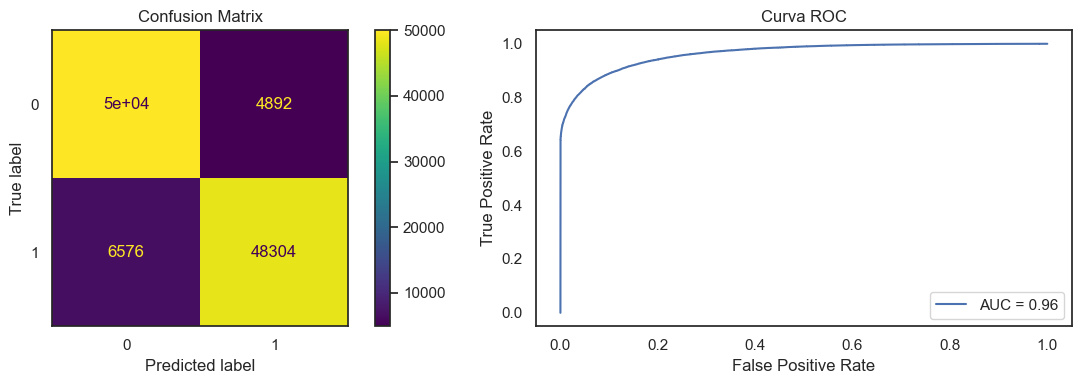

In [78]:
show(xgb_eval)

#### 5.4.8 AdaBoost Classifier
AdaBoost è un metodo ensemble di boosting il cui principio di base è quello di allenare un insieme di classificatori deboli su versioni modificate ripetutamente dei dati. Le previsioni dei classificatori sono successivamente combinate attraverso un voto a maggioranza ponderata per produrre la previsione finale. Le modifiche dei dati ad ogni iterazione consistono nell'applicazione di pesi a ciascuno dei classificatori in addestramento. Inizialmente, questi pesi sono tutti eguali (con valore 1/N); per ogni iterazione successiva, i pesi campione vengono modificati individualmente e l'algoritmo di apprendimento viene riapplicato ai dati reimpostati.

In ogni fase, i record erroneamente predetti dal modello avranno i pesi aumentati, mentre i pesi sono diminuiti per quelli che sono stati predetti correttamente. Con il procedere delle iterazioni, gli esempi difficili da prevedere ricevono un'influenza sempre crescente, per cui ogni successivo classificatore è costretto a concentrarsi sugli esempi che mancano nelle iterazioni precedenti.

In [79]:
adaBoost_clf = AdaBoostClassifier(base_estimator=dc_clf, n_estimators=50,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaBoost_clf.fit(x_train_scaled,Y_train)

name = "AdaBoost Classifier"

ada_eval = evaluate_model(adaBoost_clf, x_test_scaled, Y_test)

save(dataResults, name, ada_eval['acc'], ada_eval['rec'], ada_eval['prec'], ada_eval['f1'])

print(name)
print("Classification Report:\n")
print(ada_eval['cr'])

AdaBoost Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     54903
           1       0.89      0.90      0.90     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783



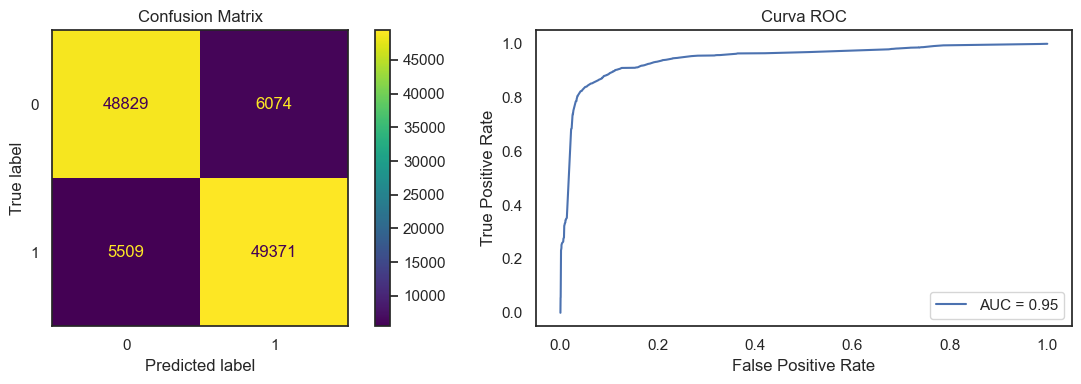

In [80]:
show(ada_eval)

#### 5.4.9 Voting Classifier
In questa tecnica, diversi modelli di classificazione indipendenti vengono addestrati sullo stesso set di dati. Le previsioni dei modelli vengono combinate tramite votazione maggioritaria (nel voto hard) o basandosi sulla probabilità media di apparteneneza alle classi (nel voto soft) per ottenere una previsione finale. Tale tipologia di classificatore risulta essere utile per un insieme di modelli ugualmente performanti al fine di bilanciare le proprie debolezze individuali.

In [81]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=100, weights='uniform', leaf_size=30)),
    ('SGD', SGDClassifier(random_state = 42, loss = 'log_loss', penalty = 'l1', learning_rate = 'constant', eta0 = 0.01)),
    ('Logistic Regression', LogisticRegression(random_state = 42, solver = 'liblinear' ,penalty = 'l1', class_weight = 'balanced')
)], voting='soft')
voting_clf.fit(x_train_scaled,Y_train)

name = "Voting Classifier"

vot_eval = evaluate_model(voting_clf, x_test_scaled, Y_test)

save(dataResults, name, vot_eval['acc'], vot_eval['rec'], vot_eval['prec'], vot_eval['f1'])

print(name)
print("Classification Report:\n")
print(vot_eval['cr'])

Voting Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     54903
           1       0.83      0.85      0.84     54880

    accuracy                           0.84    109783
   macro avg       0.84      0.84      0.84    109783
weighted avg       0.84      0.84      0.84    109783



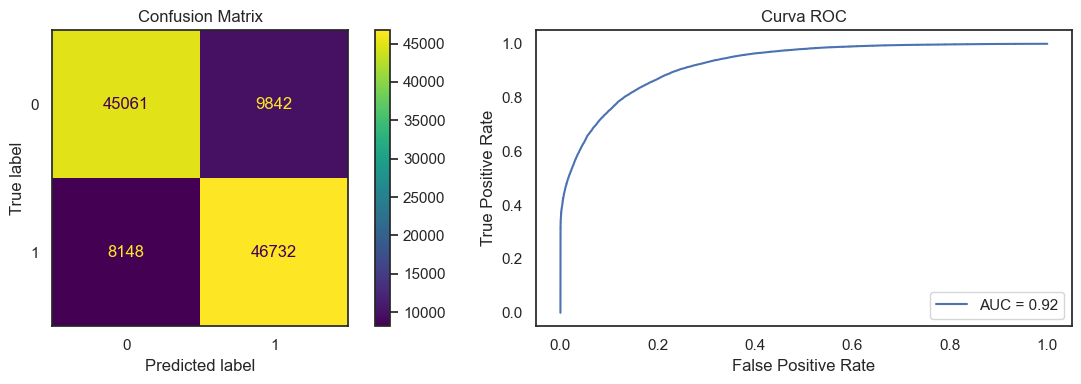

In [82]:
show(vot_eval)

#### 5.4.10 Bagging
Bagging (Bootsrap Aggregating) consiste nell'addestramento di più modelli indipendenti su campioni casualmente selezionati dal set di dati di addestramento. Il campionamento è con sostitizione per cui alcuni record potrebbero non essere presenti in nessun dataset, mentre altri invece possono essere presenti più volte. Ogni bootstrap sample ha la stesso dimensione del dataset di partenza. Le previsioni dei singoli modelli vengono combinate tramite votazione per ottenere una previsione finale.

In [83]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=30, bootstrap=True)

bag_clf.fit(x_train_scaled,Y_train)

name = "Bagging Classifier"

bag_eval = evaluate_model(bag_clf, x_test_scaled, Y_test)

save(dataResults, name, bag_eval['acc'], bag_eval['rec'], bag_eval['prec'], bag_eval['f1'])

print(name)
print("Classification Report:\n")
print(bag_eval['cr'])

Bagging Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     54903
           1       0.81      0.83      0.82     54880

    accuracy                           0.82    109783
   macro avg       0.82      0.82      0.82    109783
weighted avg       0.82      0.82      0.82    109783



#### 5.4.11 Rete neurale
Le reti neurali sono dei particolari modelli di classificazione che cercano di simulare il funzionamento del cervello umano. Una rete neurale è infatta composta dalle seguenti componenti:
- Nodi, che rappresentano i neuroni
- Collegamenti, che rappresentano gli assoni
- Pesi sui collegamenti, che rappresentano la forza della connessione sinaptica tra due neuroni
- Valore di attivazione, che corrisponde al segnale che i neuroni si scambiano

Le reti neurali multilivello sono caratterizzate da:
- Livello di input: livello al quale vengono codificati i dati di input.
- Livelli nascosti: lavorano su feature sempre più astratte man mano che si va in profondità e, ognuno di questi livelli, lavora sull'output del livello precedente.
- Livello di output: effetttua la previsione finale basandosi sui risultati dei layer precedenti.

In [84]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state = 42, learning_rate = 'adaptive', activation = 'relu', solver='adam')

mlp_clf.fit(x_train_scaled,Y_train)

name = "MLP Classifier"

mlp_eval = evaluate_model(mlp_clf, x_test_scaled, Y_test)

save(dataResults, name, mlp_eval['acc'], mlp_eval['rec'], mlp_eval['prec'], mlp_eval['f1'])

print(name)
print("Classification Report:\n")
print(mlp_eval['cr'])

MLP Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     54903
           1       0.84      0.85      0.84     54880

    accuracy                           0.84    109783
   macro avg       0.84      0.84      0.84    109783
weighted avg       0.84      0.84      0.84    109783



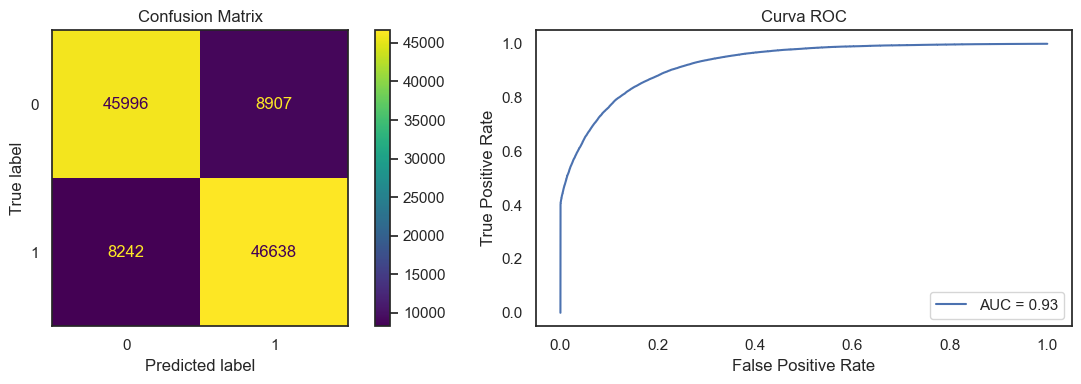

In [85]:
show(mlp_eval)

### 5.5 Confronto

Le tecniche esaminate nelle fasi precedenti hanno fornito dei buoni risultati. In questa fase andremo a confrontare numericamente e graficamente i vari modelli ottenuti.

In [86]:
dataResults.head(40)

Accuracy    Recall  Precision  F1 Score
Random Forest (Imbalanced)       0.911419  0.039592   0.608696  0.074348
Random Forest (Oversampling)     0.822013  0.854774   0.802155  0.827629
Random Forest (Undersampling)    0.754058  0.815621   0.727050  0.768793
SGDClassifier                    0.827022  0.823196   0.829484  0.826328
K-Nearest Neighbors              0.829272  0.853426   0.814044  0.833270
Decision Tree                    0.885447  0.893786   0.879082  0.886373
Logistic Regression              0.829855  0.824526   0.833349  0.828914
ExtraTrees Classifier            0.909849  0.909785   0.909868  0.909826
Guassian Naive Bayes Classifier  0.735396  0.720044   0.742768  0.731229
XGBoost Classifier               0.895539  0.880175   0.908038  0.893889
AdaBoost Classifier              0.894492  0.899617   0.890450  0.895010
Voting Classifier                0.836131  0.851531   0.826033  0.838588
Bagging Classifier               0.815154  0.825510   0.808697  0.817017
MLP Classifier                   0.843792  0.849818   0.839644  0.844700

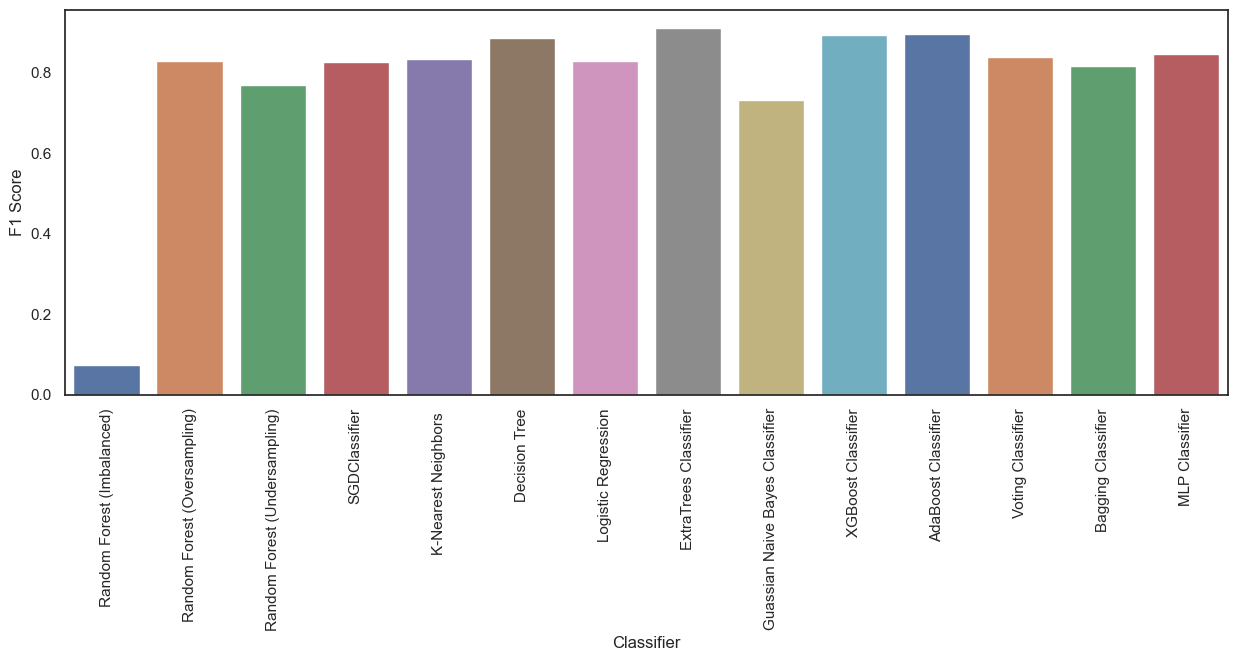

In [87]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['F1 Score'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.show()

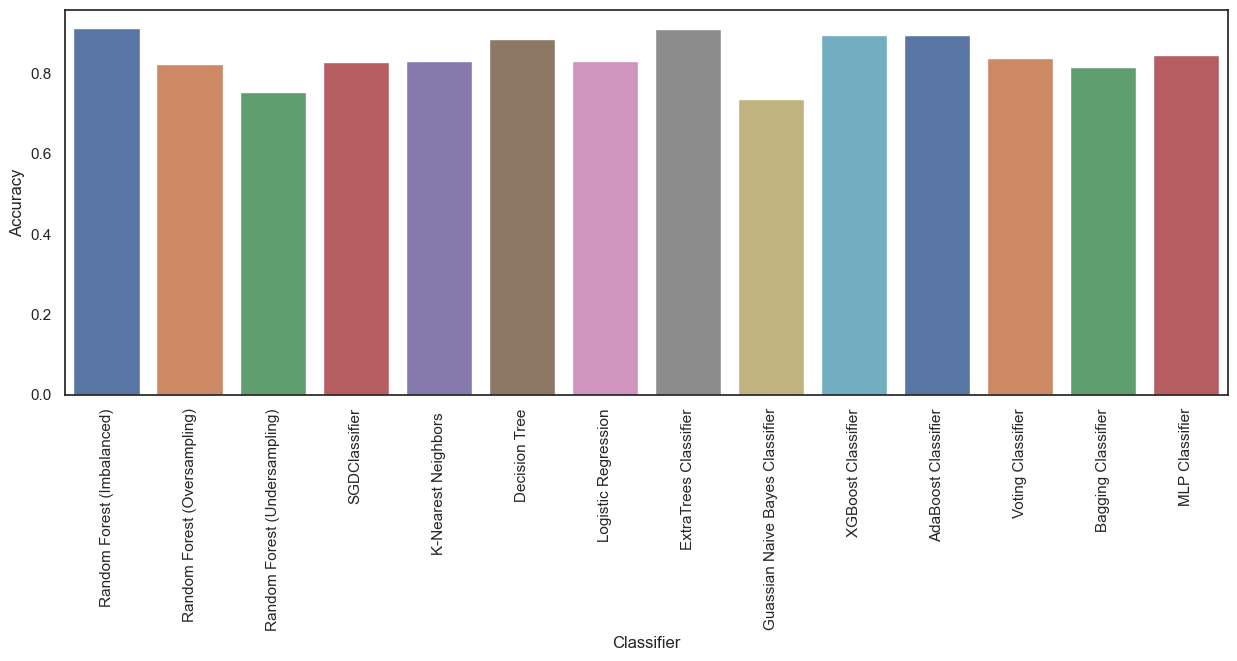

In [88]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Accuracy'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()

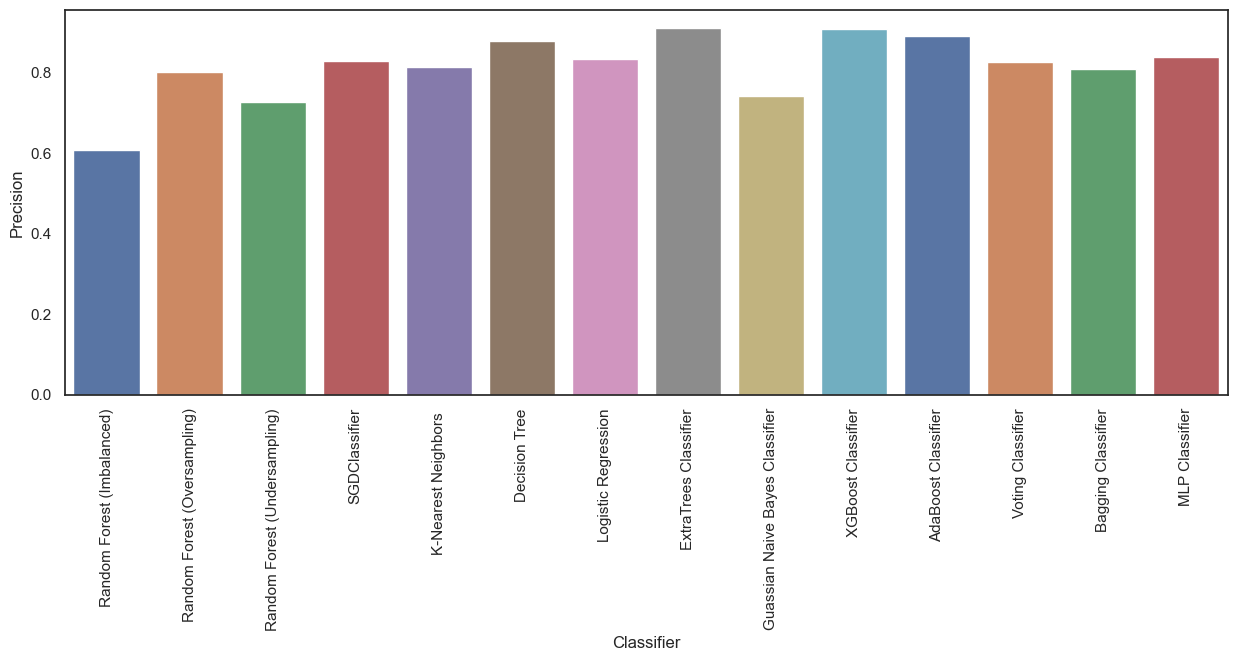

In [89]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Precision'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.show()

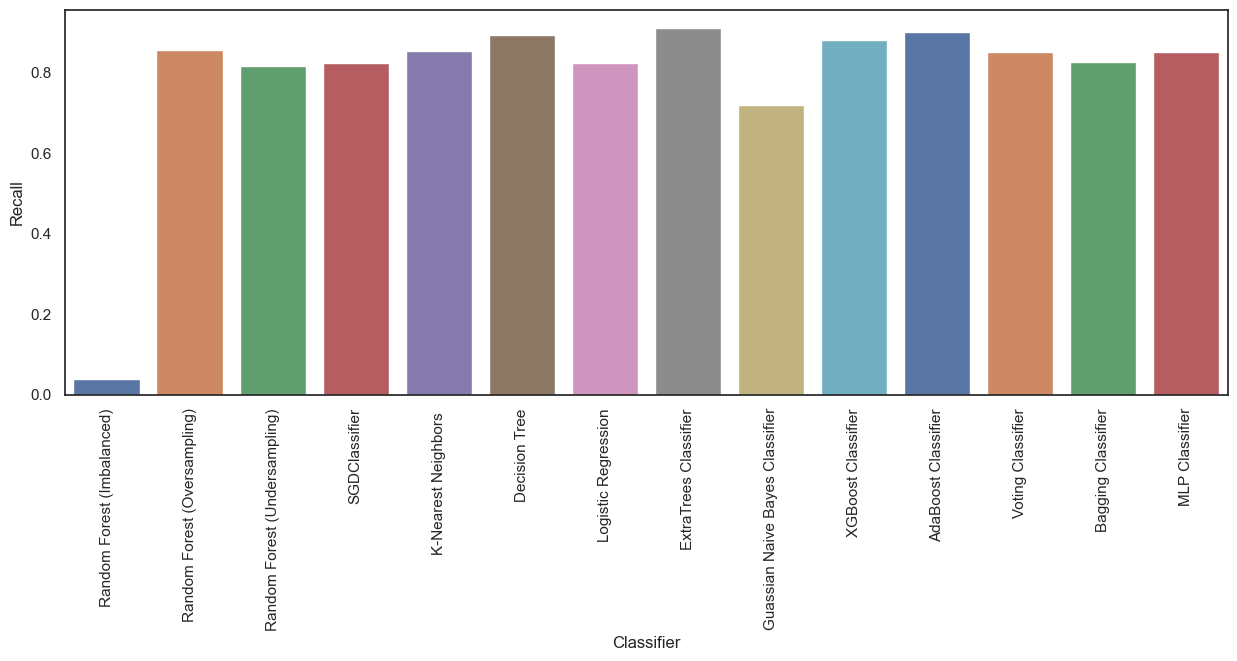

In [90]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Recall'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.show()

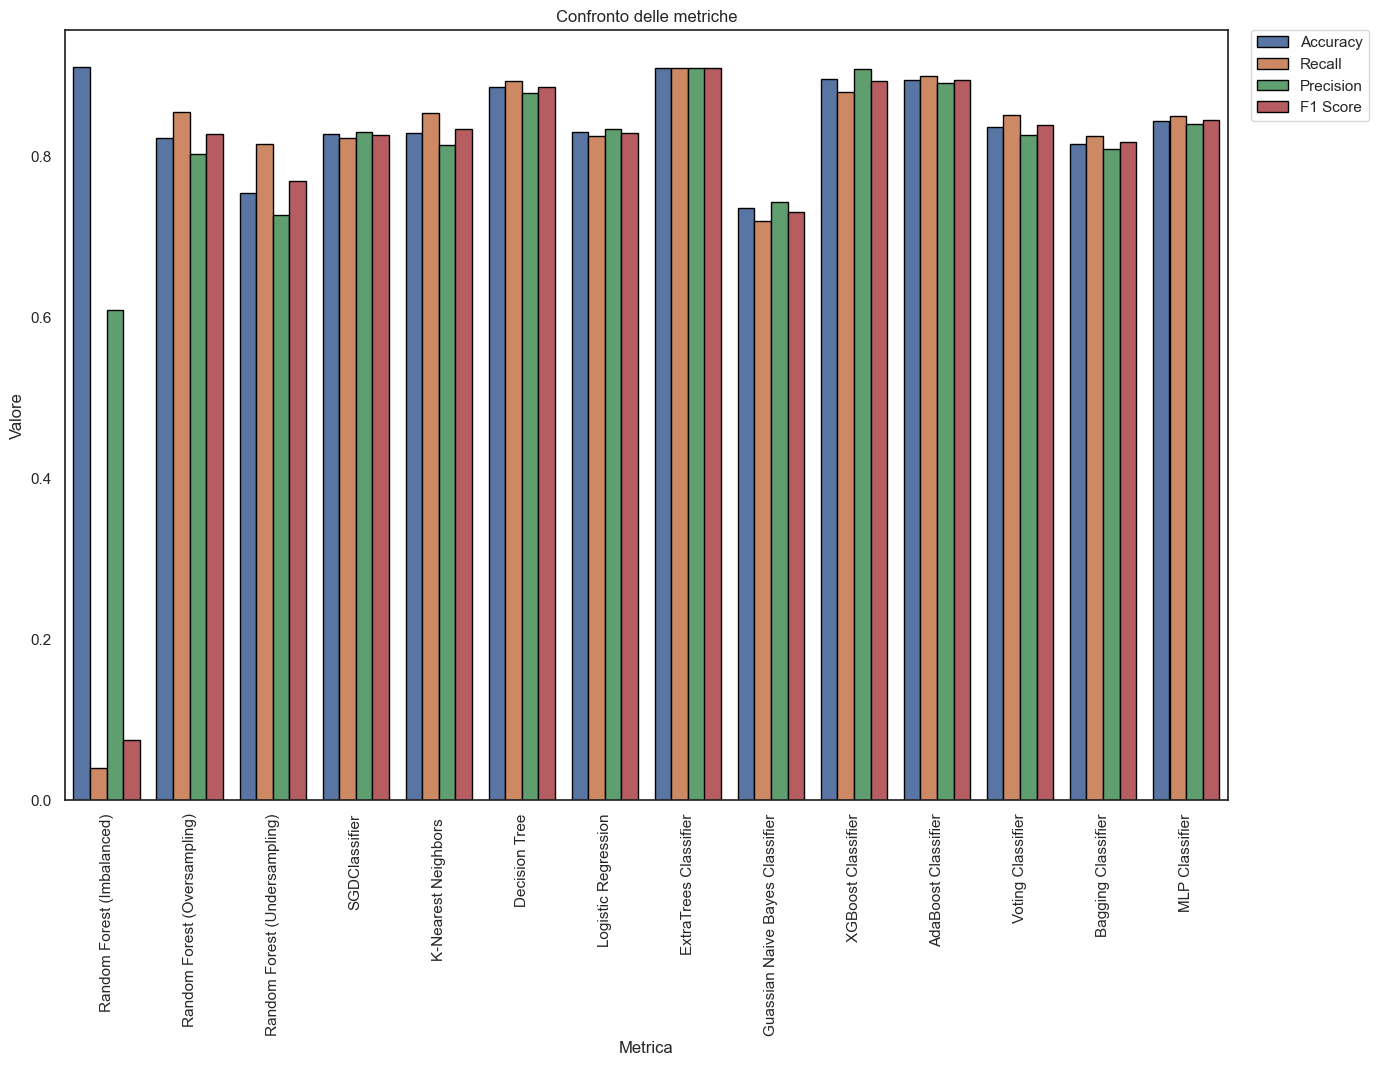

In [91]:
confronto_metriche(dataResults)

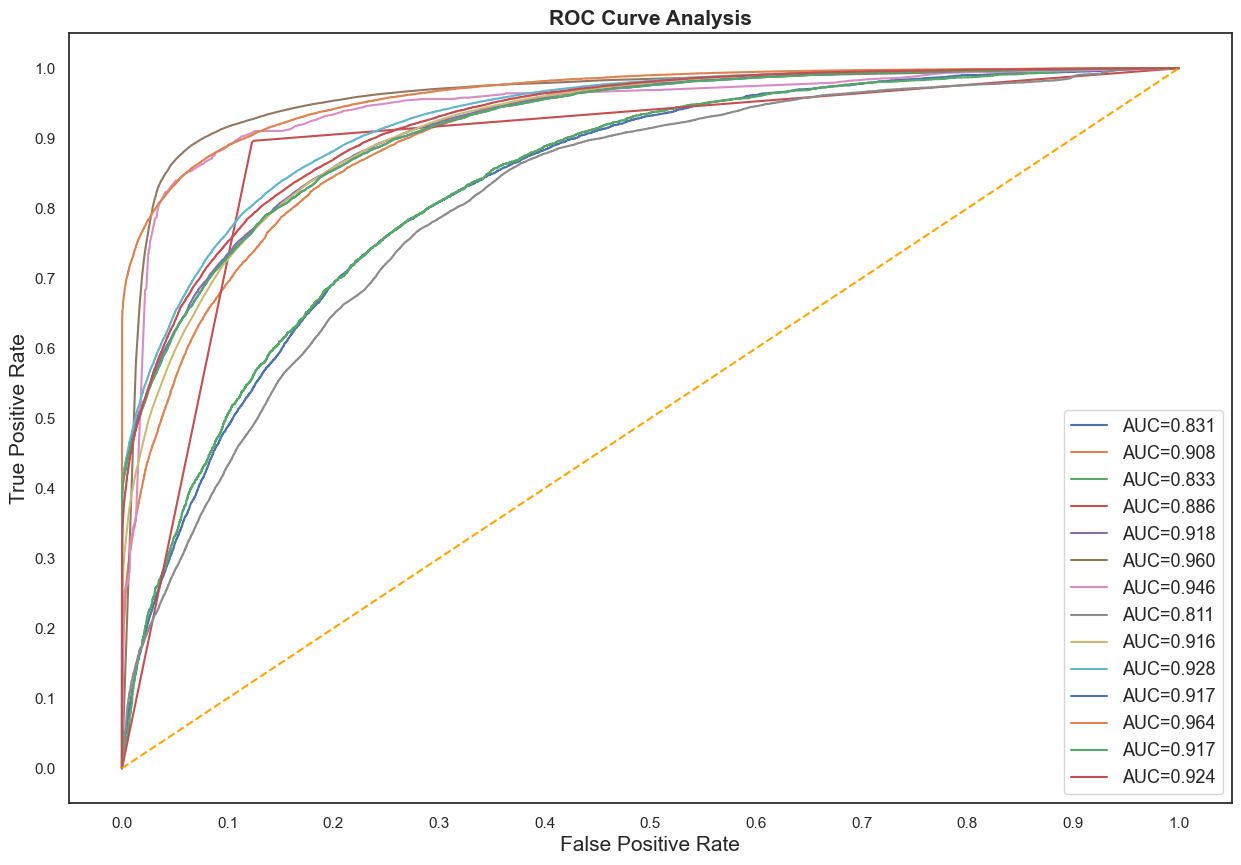

In [92]:
models_eval = [rfc_imb_eval, rfc_ovr_eval, rfc_und_eval, dc_eval, lr_eval, xt_eval, ada_eval, gnb_eval, knn_eval, mlp_eval, sgd_eval, xgb_eval, sgd_eval, vot_eval]

fig = plt.figure(figsize=(15,10))

for eval in models_eval:
    plt.plot(eval['fpr'], 
             eval['tpr'], 
             label="AUC={:.3f}".format(eval['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Dall'analisi grafica notiamo che i migliori modelli di classificazione sono:
- Random Forest
- AdaBoost
- ExtraTree
- Decision Tree

### 5.6 Ottimizzazione dei modelli

In questa fase andremo ad ottimizzare (tramite GridSearch) i migliori modelli tra quelli analizzati in precedenza.

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
result_grid = pd.DataFrame(columns=['Accuracy', 'Recall','Precision', 'F1 Score'])

In [95]:
param_dc_clf = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10],
                'splitter': ['best', 'random']
               }

grid_search = GridSearchCV(dc_clf, param_dc_clf, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(x_train_scaled, Y_train)

print("Best Param:", grid_search.best_params_)
best_dc_clf = grid_search.best_estimator_

name = "Best Decision Tree Classifier"
dc_grid_eval = evaluate_model(grid_search, x_test_scaled, Y_test)

save(dataResults, name, dc_grid_eval['acc'], dc_grid_eval['rec'], dc_grid_eval['prec'], dc_grid_eval['f1'])
save(result_grid, name, dc_grid_eval['acc'], dc_grid_eval['rec'], dc_grid_eval['prec'], dc_grid_eval['f1'])

print(name)
print("Classification Report:\n")
print(dc_grid_eval['cr'])

Best Param: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Best Decision Tree Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     54903
           1       0.88      0.89      0.89     54880

    accuracy                           0.89    109783
   macro avg       0.89      0.89      0.89    109783
weighted avg       0.89      0.89      0.89    109783



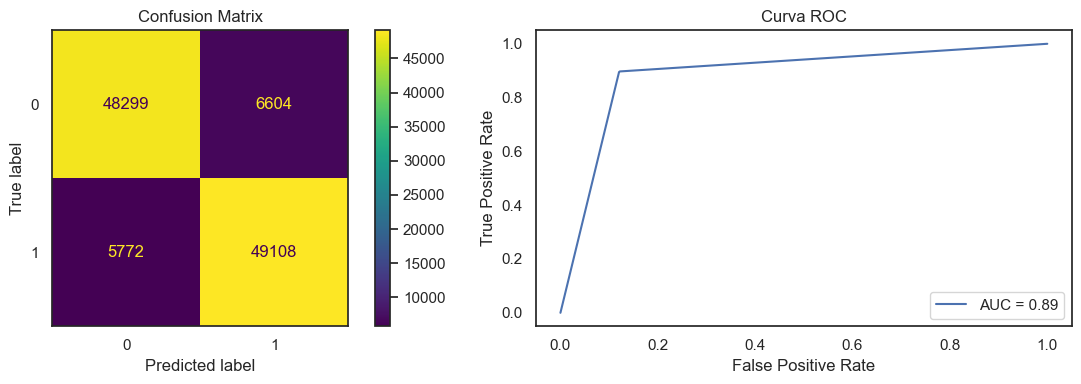

In [96]:
show(dc_grid_eval)

In [97]:
param_xt_clf = {'class_weight':['balanced', 'balanced_subsample'],
                'n_estimators': [5, 10],
                'max_depth': [None, 10]
               }

grid_search = GridSearchCV(xt_clf, param_xt_clf, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(x_train_scaled, Y_train)

print("Best Param:", grid_search.best_params_)
best_xt_clf = grid_search.best_estimator_

name = "Best ExtraTrees Classifier"
xt_grid_eval = evaluate_model(grid_search, x_test_scaled, Y_test)

save(dataResults, name, xt_grid_eval['acc'], xt_grid_eval['rec'], xt_grid_eval['prec'], xt_grid_eval['f1'])
save(result_grid, name, xt_grid_eval['acc'], xt_grid_eval['rec'], xt_grid_eval['prec'], xt_grid_eval['f1'])

print(name)
print("Classification Report:\n")
print(xt_grid_eval['cr'])

Best Param: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 10}
Best ExtraTrees Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     54903
           1       0.91      0.90      0.91     54880

    accuracy                           0.91    109783
   macro avg       0.91      0.91      0.91    109783
weighted avg       0.91      0.91      0.91    109783



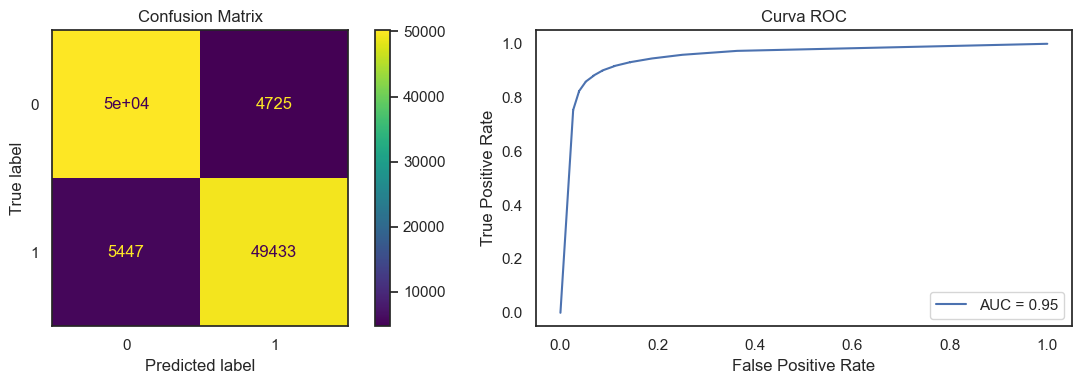

In [98]:
show(xt_grid_eval)

In [99]:
param_rf_grid = {
    'n_estimators': [10, 30],
    'min_samples_split': [2, 5],
    'max_depth': [None, 10]
}

grid_search = GridSearchCV(rfc_ovr, param_rf_grid, scoring='f1', return_train_score=True)
grid_search.fit(x_train_scaled, Y_train)

print("Best Param:", grid_search.best_params_)
best_rf_clf = grid_search.best_estimator_

name = "Best Random Forest"
rf_grid_eval = evaluate_model(grid_search, x_test_scaled, Y_test)

save(dataResults, name, rf_grid_eval['acc'], rf_grid_eval['rec'], rf_grid_eval['prec'], rf_grid_eval['f1'])
save(result_grid, name, rf_grid_eval['acc'], rf_grid_eval['rec'], rf_grid_eval['prec'], rf_grid_eval['f1'])

print(name)
print("Classification Report:\n")
print(rf_grid_eval['cr'])

Best Param: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}
Best Random Forest
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     54903
           1       0.92      0.91      0.92     54880

    accuracy                           0.92    109783
   macro avg       0.92      0.92      0.92    109783
weighted avg       0.92      0.92      0.92    109783



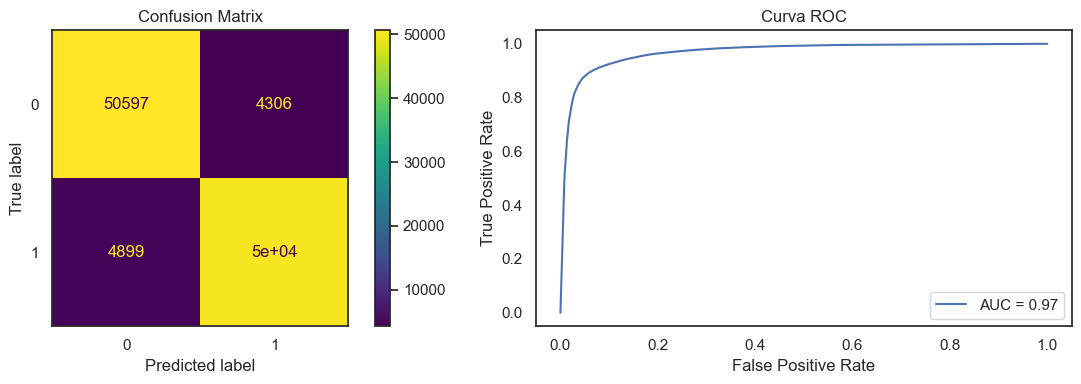

In [100]:
show(rf_grid_eval)

In [116]:
param_xgb_grid = {
    'max_depth': [None, 10],
    'learning_rate': [0.1, 0.001]
}

grid_search = GridSearchCV(xgb_clf, param_xgb_grid, scoring='f1', return_train_score=True)
grid_search.fit(x_train_scaled, Y_train)

print("Best Param:", grid_search.best_params_)
best_xgb_clf = grid_search.best_estimator_

name = "Best XGBoost Classifier"
xgb_grid_eval = evaluate_model(grid_search, x_test_scaled, Y_test)

save(dataResults, name, xgb_grid_eval['acc'], xgb_grid_eval['rec'], xgb_grid_eval['prec'], xgb_grid_eval['f1'])
save(result_grid, name, xgb_grid_eval['acc'], xgb_grid_eval['rec'], xgb_grid_eval['prec'], xgb_grid_eval['f1'])

print(name)
print("Classification Report:\n")
print(xgb_grid_eval['cr'])

In [ ]:
show(xgb_eval)

In [103]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" : ["best", "random"],
              "n_estimators": [1, 2]
             }

grid_search = GridSearchCV(adaBoost_clf, param_grid=param_grid, scoring = 'f1', return_train_score=True)
grid_search.fit(x_train_scaled, Y_train)

print("Best Param:", grid_search.best_params_)
best_ada_clf = grid_search.best_estimator_

name = "Best AdaBoost Classifier"
ada_grid_eval = evaluate_model(grid_search, x_test_scaled, Y_test)

save(dataResults, name, ada_grid_eval['acc'], ada_grid_eval['rec'], ada_grid_eval['prec'], ada_grid_eval['f1'])
save(result_grid, name, ada_grid_eval['acc'], ada_grid_eval['rec'], ada_grid_eval['prec'], ada_grid_eval['f1'])

print(name)
print("Classification Report:\n")
print(ada_grid_eval['cr'])

Best Param: {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 2}
Best AdaBoost Classifier
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     54903
           1       0.94      0.85      0.89     54880

    accuracy                           0.90    109783
   macro avg       0.90      0.90      0.90    109783
weighted avg       0.90      0.90      0.90    109783



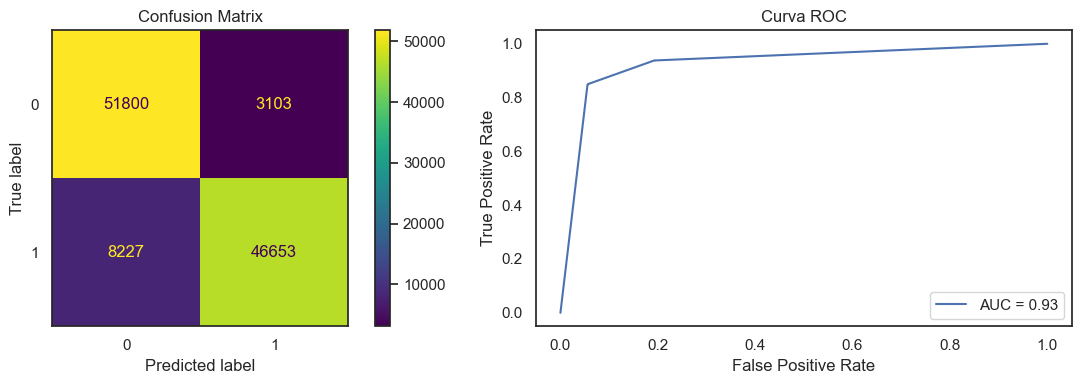

In [104]:
show(ada_grid_eval)

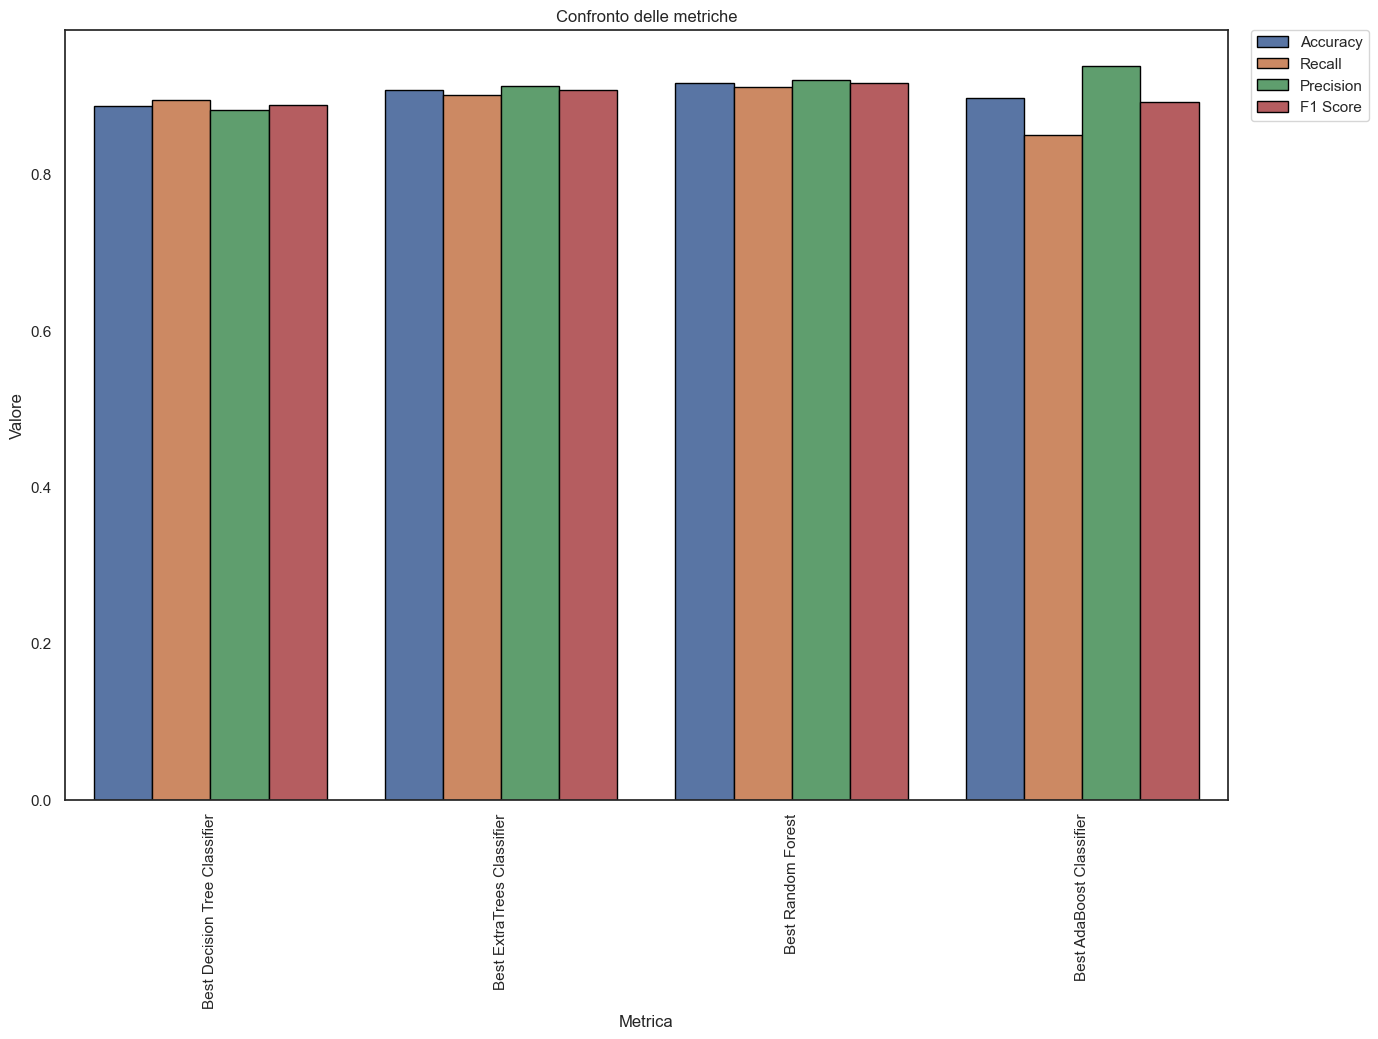

In [105]:
confronto_metriche(result_grid)

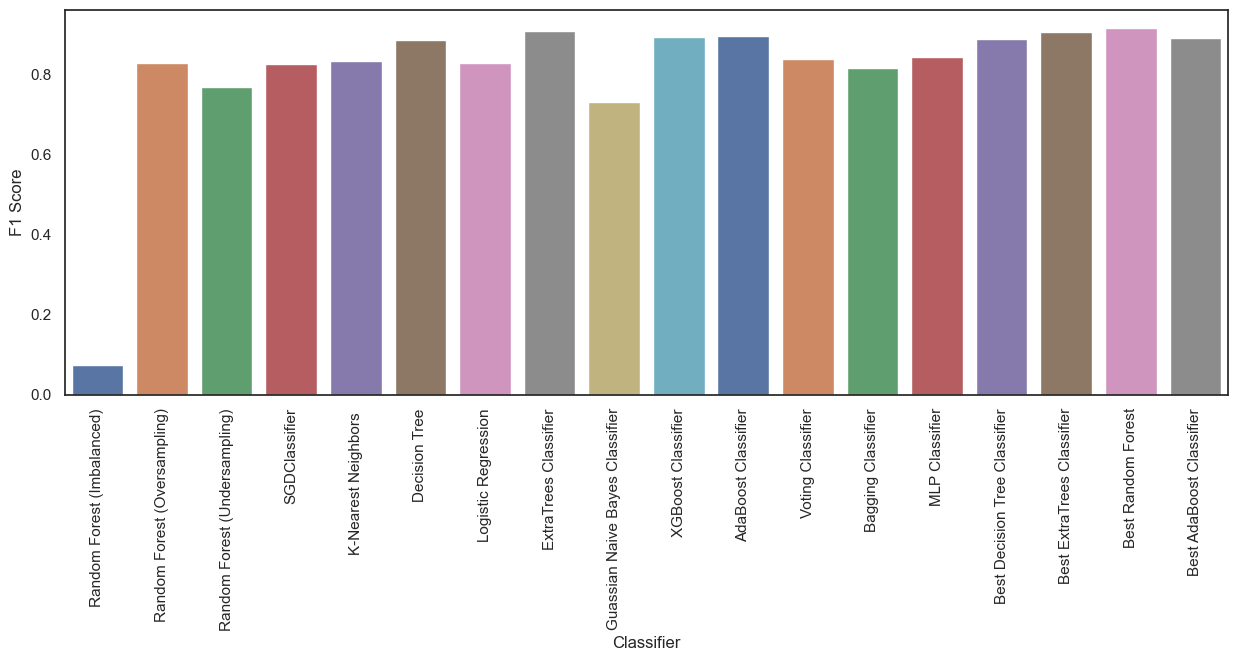

In [106]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['F1 Score'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.show()

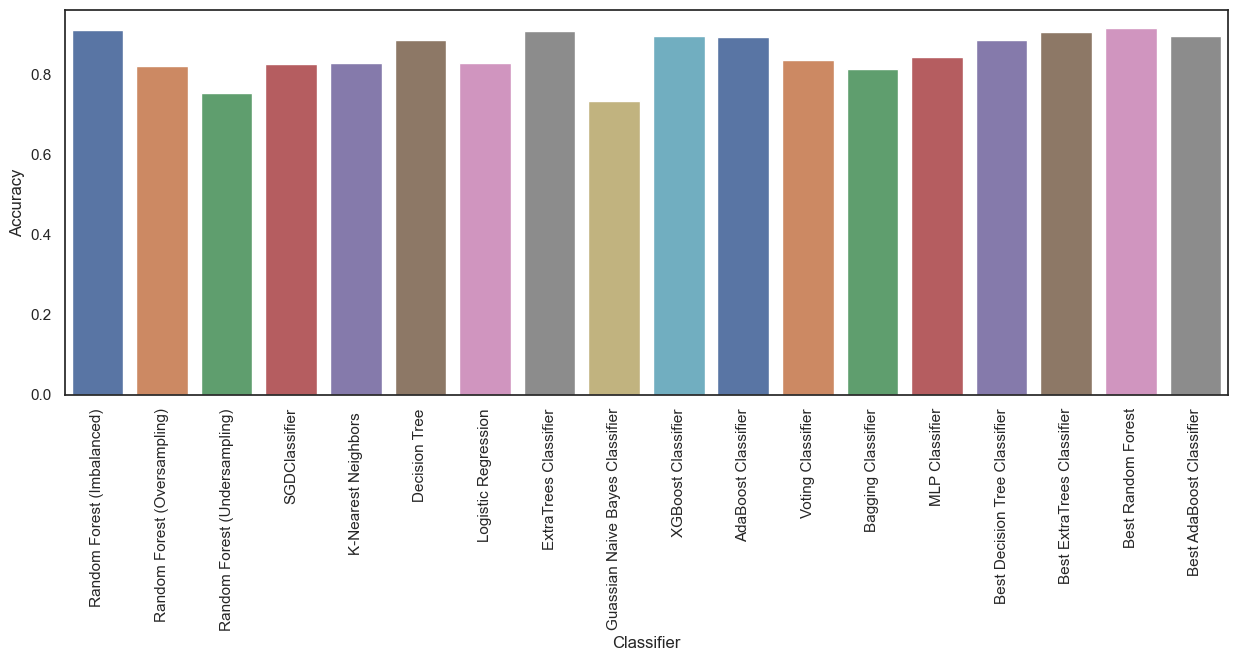

In [107]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Accuracy'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()

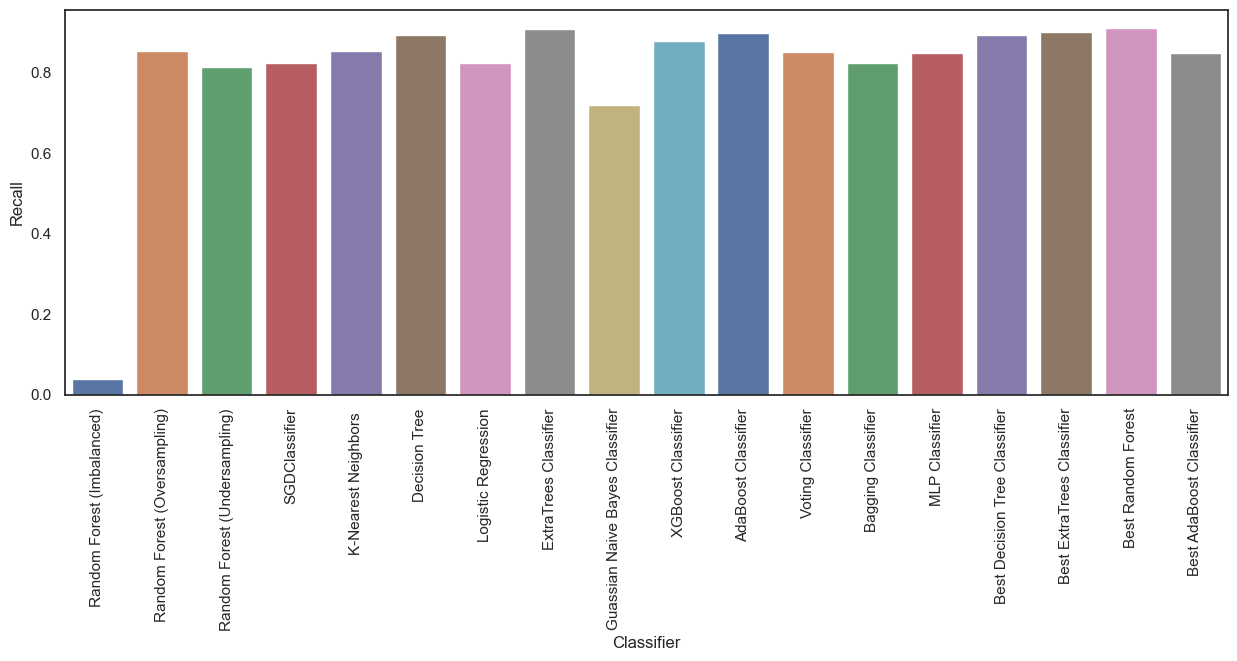

In [108]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Recall'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.xlabel('Classifier')
plt.show()

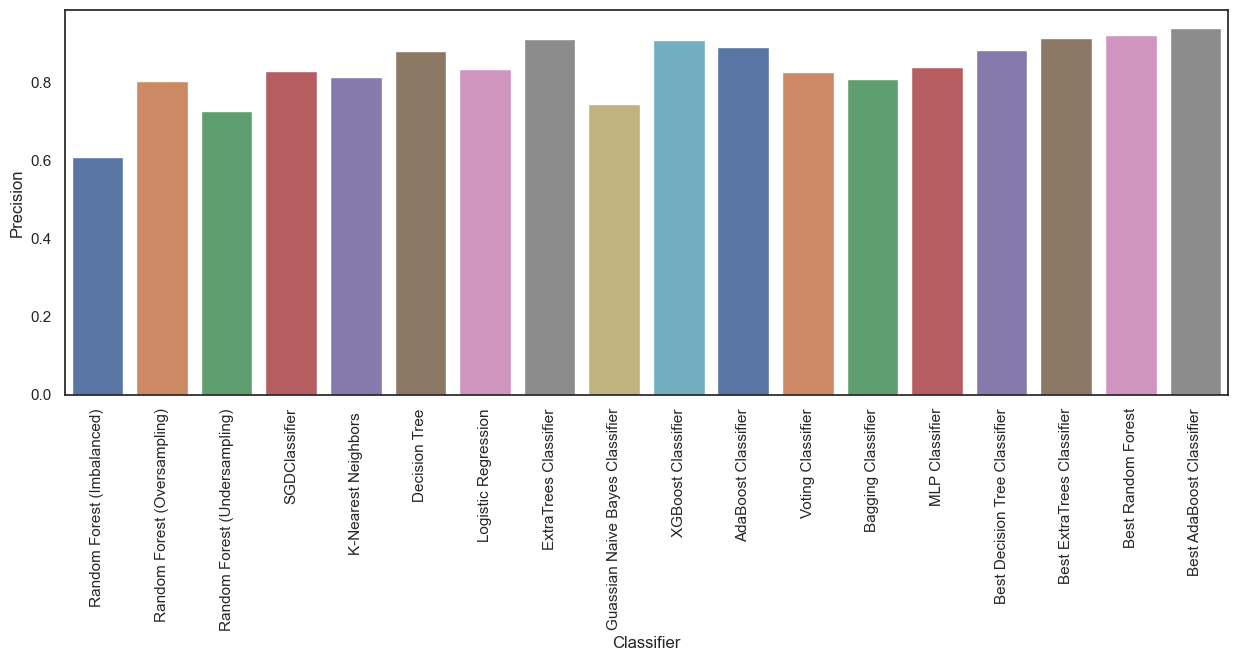

In [109]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x=dataResults.index, y=dataResults['Precision'], palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.xlabel('Classifier')
plt.show()

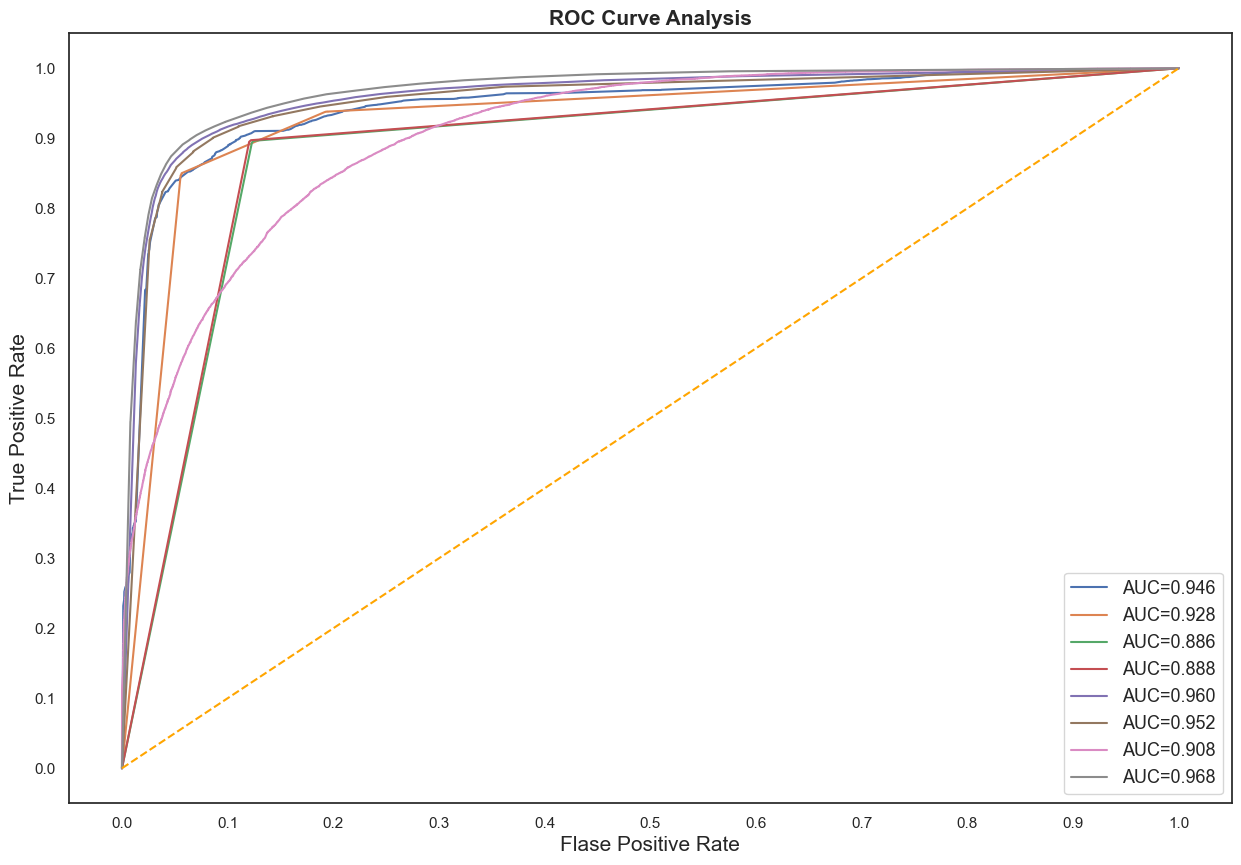

In [110]:
fig = plt.figure(figsize=(15,10))

models_eval =  [ada_eval, ada_grid_eval, dc_eval, dc_grid_eval, xt_eval, xt_grid_eval, rfc_ovr_eval, rf_grid_eval]

for eval in models_eval:
    plt.plot(eval['fpr'], 
             eval['tpr'], 
             label="AUC={:.3f}".format(eval['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [111]:
dataResults.sort_values(by='F1 Score', ascending=False).head(20)

Accuracy    Recall  Precision  F1 Score
Best Random Forest               0.916153  0.910733   0.920681  0.915680
ExtraTrees Classifier            0.909849  0.909785   0.909868  0.909826
Best ExtraTrees Classifier       0.907344  0.900747   0.912755  0.906711
AdaBoost Classifier              0.894492  0.899617   0.890450  0.895010
XGBoost Classifier               0.895539  0.880175   0.908038  0.893889
Best AdaBoost Classifier         0.896796  0.850091   0.937636  0.891720
Best Decision Tree Classifier    0.887269  0.894825   0.881462  0.888093
Decision Tree                    0.885447  0.893786   0.879082  0.886373
MLP Classifier                   0.843792  0.849818   0.839644  0.844700
Voting Classifier                0.836131  0.851531   0.826033  0.838588
K-Nearest Neighbors              0.829272  0.853426   0.814044  0.833270
Logistic Regression              0.829855  0.824526   0.833349  0.828914
Random Forest (Oversampling)     0.822013  0.854774   0.802155  0.827629
SGDClassifier                    0.827022  0.823196   0.829484  0.826328
Bagging Classifier               0.815154  0.825510   0.808697  0.817017
Random Forest (Undersampling)    0.754058  0.815621   0.727050  0.768793
Guassian Naive Bayes Classifier  0.735396  0.720044   0.742768  0.731229
Random Forest (Imbalanced)       0.911419  0.039592   0.608696  0.074348

## 6. Conclusioni



Come si può evincere dai grafici precedenti, il modello con le migliori prestazioni in assoluto è il Random Forest con la seguente combinazione di parametri:
- {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}

Più in generale, è possibile notare come la maggior parte dei modelli più performanti siano modelli basati su alberi decisionali, risultando molto performanti sia nella versione "standard" che nella versione ottimizzata tramite GridSearch.

In [112]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  301717 non-null  float64
 1   Smoking                              301717 non-null  int64  
 2   AlcoholDrinking                      301717 non-null  int64  
 3   Stroke                               301717 non-null  int64  
 4   PhysicalHealth                       301717 non-null  float64
 5   MentalHealth                         301717 non-null  float64
 6   DiffWalking                          301717 non-null  int64  
 7   Sex                                  301717 non-null  int64  
 8   AgeCategory                          301717 non-null  float64
 9   Diabetic                             301717 non-null  bool   
 10  PhysicalActivity                     301717 non-null  int64  
 11  SleepTime         

La feature importance è calcolata come la diminuzione dell'impurità del nodo ponderata per la probabilità di raggiungere quel nodo. La probabilità del nodo può essere calcolata dal numero di campioni che raggiungono il nodo, diviso per il numero totale di campioni. Maggiore è il valore, più importante è la caratteristica.

Elapsed time to compute the importances: 0.092 seconds


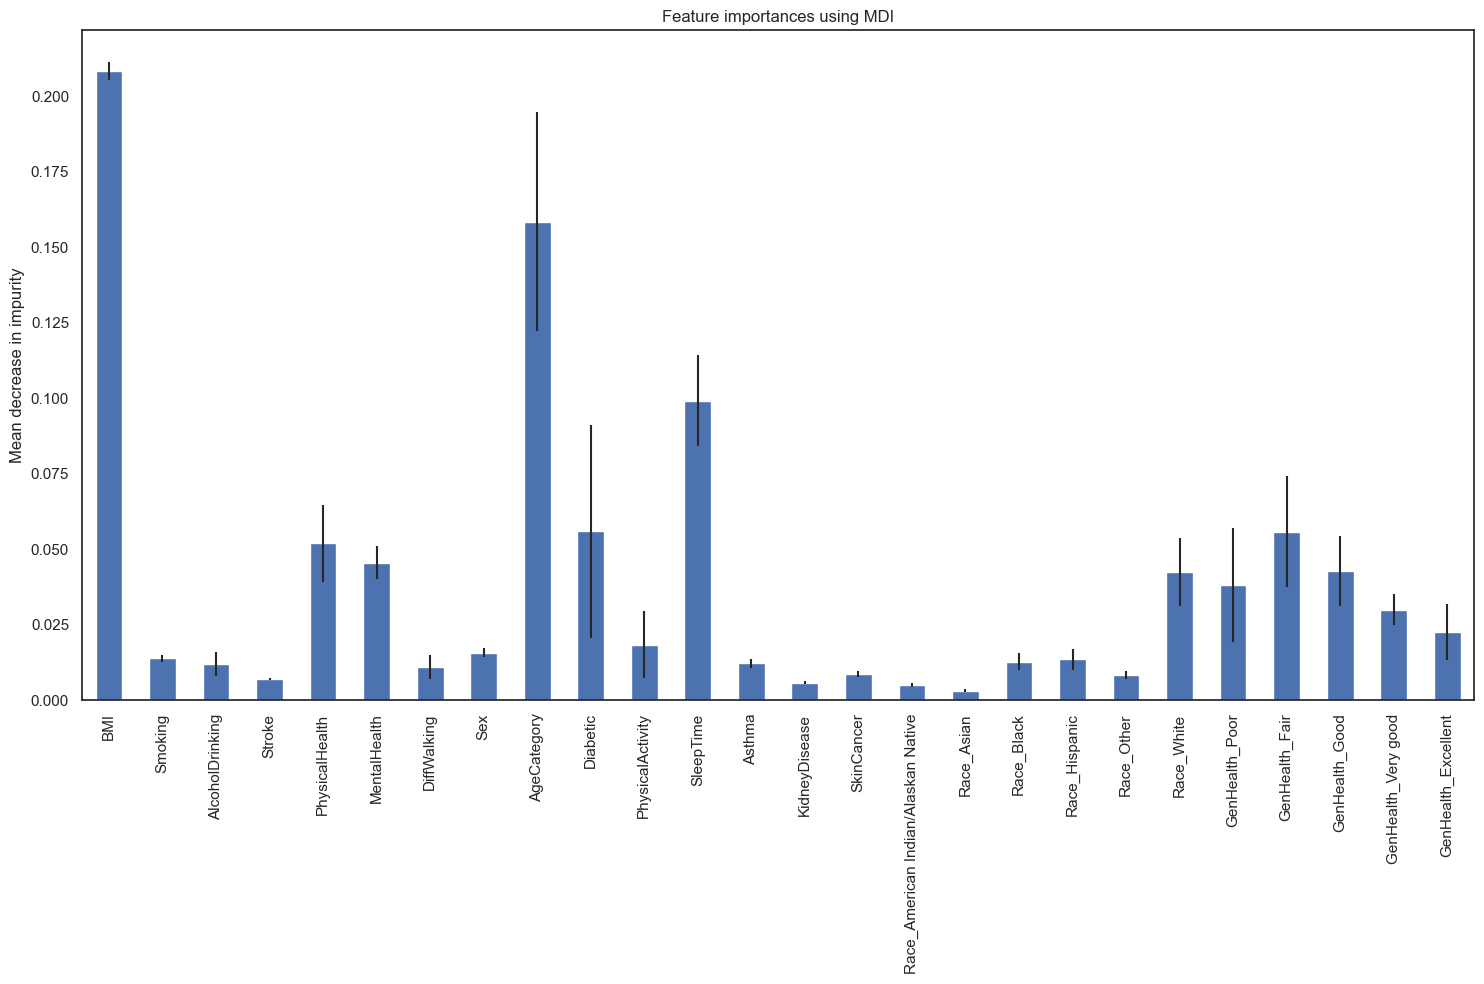

In [115]:
import time

feature_names = [f"{feature}" for feature in x.columns]

start_time = time.time()
importances = best_rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Dall'analisi delle feature importances del modello Random Forest (Grid) è stato possibile notare come le caratteristiche che presentano maggior importanza sono:
- BMI
- AgeCategory
- SleepTime